In [1]:
import numpy as np
from skypy.pipeline import Pipeline
import matplotlib.pyplot as plt
import astropy.io.fits as pyfits
import speclite.filters as spec
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(Om0=0.3, H0=70)

from chainconsumer import ChainConsumer

# plt.rc('font',**{'family':'serif','size':14})
# plt.rc('text', usetex=True)

In [2]:
pipeline = Pipeline.read("COSMOS2020_tortorelli2021.yaml")
pipeline.execute()

In [32]:
print(pipeline["mag_lim"])

27


In [3]:
sim_sf = pipeline['SF']
sim_q = pipeline['Q']
sim = np.concatenate((sim_sf, sim_q))
print(len(sim))

630073


In [4]:
print(sim['m_vista_sim'][:,3])

[-0.16791691 -0.03383725  0.02801795 ...  0.0067106  -0.01155742
 -0.00156773]


In [5]:
mask = np.where((sim['m_vista_true'][:,3]+sim['m_vista_sim'][:,3]<24.5)&(sim['z']>0))[0]
sim = sim[mask]
print(len(sim))

463122


In [6]:
# pipeline = Pipeline.read("/Users/philipp/Documents/PhD/lum_func_measurement/COSMOS2020_Will.yaml")
# pipeline.execute()

In [7]:
sim_sf = pipeline['SF']
# sim_passive_1 = pipeline['passive_1']
# sim_passive_2 = pipeline['passive_2']
# sim_will = np.concatenate((sim_sf, sim_passive_1, sim_passive_2))
# print(len(sim_will))

In [8]:
# mask = np.where((sim_will['m_vista_true'][:,3]+sim_will['m_vista_sim'][:,3]<24.5)&(sim_will['z']>0))[0]
# sim_will = sim_will[mask]
# print(len(sim_will))

In [59]:
path_local = "/Users/philipp/Documents/PhD/Data/"
path_lustre = "/mnt/lustre/psudek/data/"

cosmos = pyfits.open(path_lustre+"COSMOS2020_Classic_processed.fits")[1].data
mask = np.where((23.9-2.5*np.log10(cosmos['UVISTA_Ks_FLUX_APER3'])<24.5)&(cosmos['photoz']>0))[0]
# mask = np.where((cosmos['UVISTA_Ks_MAG_APER3']<24.5)&(cosmos['photoz']>0))[0]
cosmos = cosmos[mask]
cosmos_abs_mag = pyfits.open(path_lustre+"Cosmos_Classic_absolute_mags.fits")[1].data['AbsMag']
print(len(cosmos))
print(len(cosmos_abs_mag))

/users/psudek/virtual_environments/sbi_env/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log10
  """


261249
261249


In [10]:
mask = np.where((cosmos['photoz']>0) &
                (cosmos['photoz']<8.) &
                 (23.9-2.5*np.log10(cosmos['UVISTA_Ks_FLUX_APER3'])<24.5) &
                (cosmos['lp_type']==0))[0]
cosmos = cosmos[mask]
cosmos_abs_mag = cosmos_abs_mag[mask]
print(len(cosmos))
print(len(cosmos_abs_mag))

261209
261209


### Compare Redshift Distribution

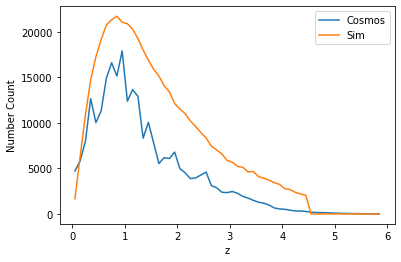

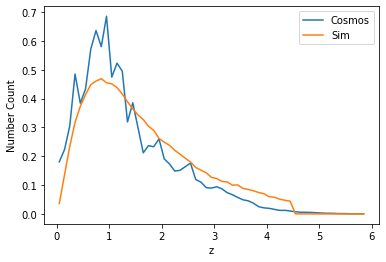

In [11]:
bins_redshift =np.arange(0,6,0.1)
bin_centers_redshift = bins_redshift[:-1] + (bins_redshift[-1]-bins_redshift[0])/(2*len(bins_redshift))

hist_cosmos, _ = np.histogram(cosmos['photoz'], bins=bins_redshift)
hist_sim, _ = np.histogram(sim['z'], bins=bins_redshift)
# hist_sim_will, _ = np.histogram(sim_will['z'], bins=bins_redshift)

plt.plot(bin_centers_redshift, hist_cosmos, label='Cosmos')
plt.plot(bin_centers_redshift, hist_sim, label='Sim')
# plt.plot(bin_centers_redshift, hist_sim_will, label='Sim Will')
plt.legend()
plt.xlabel("z")
plt.ylabel('Number Count')
plt.show()

hist_cosmos, _ = np.histogram(cosmos['photoz'], bins=bins_redshift, density=True)
hist_sim, _ = np.histogram(sim['z'], bins=bins_redshift, density=True)
# hist_sim_will, _ = np.histogram(sim_will['z'], bins=bins_redshift, density=True)

plt.plot(bin_centers_redshift, hist_cosmos, label='Cosmos')
plt.plot(bin_centers_redshift, hist_sim, label='Sim')
# plt.plot(bin_centers_redshift, hist_sim_will, label='Sim Will')
plt.legend()
plt.xlabel("z")
plt.ylabel('Number Count')
plt.show()

### Compare Apparent Magnitude Distribution

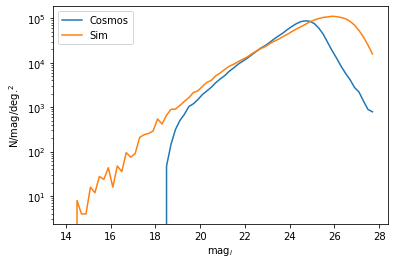

In [12]:
bins_app_mag = np.arange(14,28,0.2)
bin_centers_app_mag = bins_app_mag[:-1] + (bins_app_mag[-1]-bins_app_mag[0])/(2*len(bins_app_mag))

hist_cosmos, _ = np.histogram(cosmos['HSC_i_MAG_APER3'], bins=bins_app_mag, density=False)
hist_sim, _ = np.histogram(sim['m_hsc_true'][:,2] + sim['m_hsc_sim'][:,2] , bins=bins_app_mag, density=False)
# hist_sim_will, _ = np.histogram(sim_will['m_hsc_true'][:,2] + sim_will['m_hsc_sim'][:,2] , bins=bins_app_mag, density=False)

plt.plot(bin_centers_app_mag, hist_cosmos/1.27/0.2, label='Cosmos')
plt.plot(bin_centers_app_mag, hist_sim/1.27/0.2, label='Sim')
# plt.plot(bin_centers_app_mag, hist_sim_will/1.27/0.2, label='Sim Will')
plt.legend()
plt.xlabel(r'mag$_i$')
plt.ylabel(r'N/mag/deg.$^2$')
plt.yscale('log')
plt.show()

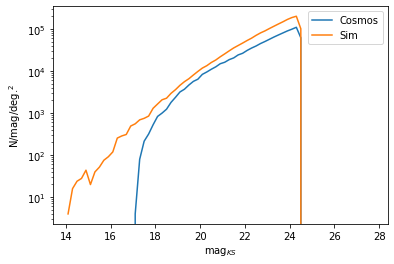

In [13]:
bins_app_mag = np.arange(14,28,0.2)
bin_centers_app_mag = bins_app_mag[:-1] + (bins_app_mag[-1]-bins_app_mag[0])/(2*len(bins_app_mag))

hist_cosmos, _ = np.histogram(cosmos['UVISTA_Ks_MAG_APER3'], bins=bins_app_mag, density=False)
hist_sim, _ = np.histogram(sim['m_vista_true'][:,3] + sim['m_vista_sim'][:,3] , bins=bins_app_mag, density=False)
# hist_sim_will, _ = np.histogram(sim_will['m_vista_true'][:,3] + sim_will['m_vista_sim'][:,3] , bins=bins_app_mag, density=False)

plt.plot(bin_centers_app_mag, hist_cosmos/1.27/0.2, label='Cosmos')
plt.plot(bin_centers_app_mag, hist_sim/1.27/0.2, label='Sim')
# plt.plot(bin_centers_app_mag, hist_sim_will/1.27/0.2, label='Sim Will')
plt.legend()
plt.xlabel(r'mag$_{KS}$')
plt.ylabel(r'N/mag/deg.$^2$')
plt.yscale('log')
plt.show()

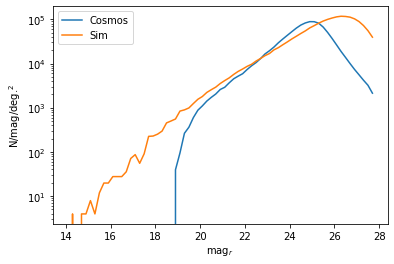

In [14]:
bins_app_mag = np.arange(14,28,0.2)
bin_centers_app_mag = bins_app_mag[:-1] + (bins_app_mag[-1]-bins_app_mag[0])/(2*len(bins_app_mag))

hist_cosmos, _ = np.histogram(cosmos['HSC_r_MAG_APER3'], bins=bins_app_mag, density=False)
hist_sim, _ = np.histogram(sim['m_hsc_true'][:,1] + sim['m_hsc_sim'][:,1] , bins=bins_app_mag, density=False)
# hist_sim_will, _ = np.histogram(sim_will['m_hsc_true'][:,1] + sim_will['m_hsc_sim'][:,1] , bins=bins_app_mag, density=False)

plt.plot(bin_centers_app_mag, hist_cosmos/1.27/0.2, label='Cosmos')
plt.plot(bin_centers_app_mag, hist_sim/1.27/0.2, label='Sim')
# plt.plot(bin_centers_app_mag, hist_sim_will/1.27/0.2, label='Sim Will')
plt.legend()
plt.xlabel(r'mag$_r$')
plt.ylabel(r'N/mag/deg.$^2$')
plt.yscale('log')
plt.show()

### Compare colour ditribution

In [63]:
gr_cosmos_mag = cosmos['HSC_g_MAG_APER3'] - cosmos['HSC_r_MAG_APER3']
iz_cosmos_mag = cosmos['HSC_i_MAG_APER3'] - cosmos['HSC_z_MAG_APER3']

gr_cosmos_flux = (23.9-2.5*np.log10(cosmos['HSC_g_FLUX_APER3'])) - \
                (23.9-2.5*np.log10(cosmos['HSC_r_FLUX_APER3']))
iz_cosmos_flux = (23.9-2.5*np.log10(cosmos['HSC_i_FLUX_APER3'])) - \
                (23.9-2.5*np.log10(cosmos['HSC_z_FLUX_APER3']))

/users/psudek/virtual_environments/sbi_env/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log10
  after removing the cwd from sys.path.
/users/psudek/virtual_environments/sbi_env/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log10
  """
/users/psudek/virtual_environments/sbi_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log10
  
/users/psudek/virtual_environments/sbi_env/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log10
  import sys


In [64]:
gr_sim = (sim['m_hsc_true'][:,0] + sim['m_hsc_sim'][:,0]) - (sim['m_hsc_true'][:,1] + sim['m_hsc_sim'][:,1])
iz_sim = (sim['m_hsc_true'][:,2] + sim['m_hsc_sim'][:,2]) - (sim['m_hsc_true'][:,3] + sim['m_hsc_sim'][:,3])

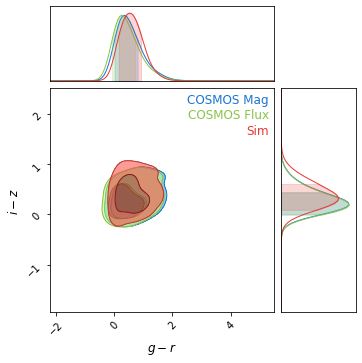

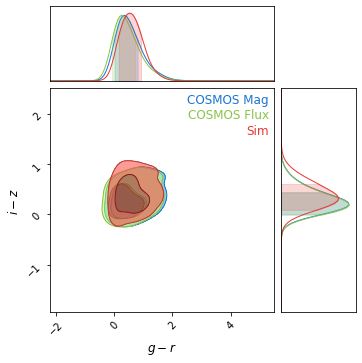

In [65]:
mask = np.isfinite(gr_cosmos) & np.isfinite(iz_cosmos)

c = ChainConsumer()
c.add_chain({r'$g-r$': gr_cosmos_mag[mask], r'$i-z$': iz_cosmos_mag[mask]}, name='COSMOS Mag')
c.add_chain({r'$g-r$': gr_cosmos_flux[mask], r'$i-z$': iz_cosmos_flux[mask]}, name='COSMOS Flux')
c.add_chain({r'$g-r$': gr_sim, r'$i-z$': iz_sim}, name='Sim')
c.plotter.plot(figsize="column", display=True)

### Compare Absolute Magnitude distribution
Use direct simulation and calculated catalogue values

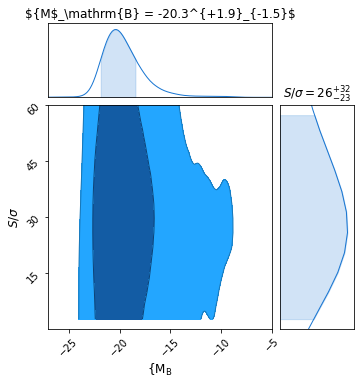

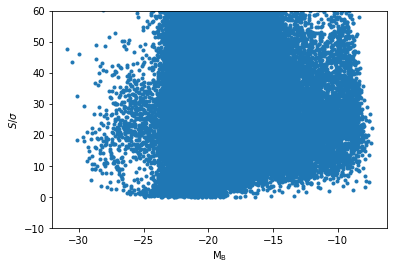

In [18]:
from chainconsumer import ChainConsumer
mask = np.isfinite(cosmos_abs_mag) #and np.isfinite(cosmos['HSC_i_FLUX_APER3']/cosmos['HSC_i_FLUXERR_APER3'])

c = ChainConsumer()
c.add_chain({r'{M$_\mathrm{B}$': cosmos_abs_mag[mask], r'$S/\sigma$': cosmos['HSC_i_FLUX_APER3'][mask]/cosmos['HSC_i_FLUXERR_APER3'][mask]})
c.plotter.plot(figsize="column", display=True, extents=[(-27,-5), (0,60)])

plt.plot(cosmos_abs_mag, cosmos['HSC_i_FLUX_APER3']/cosmos['HSC_i_FLUXERR_APER3'], '.')
plt.xlabel(r'M$_\mathrm{B}$')
plt.ylabel(r'$S/\sigma$')
plt.ylim([-10,60])
#plt.xlim([-15,5])
plt.show()

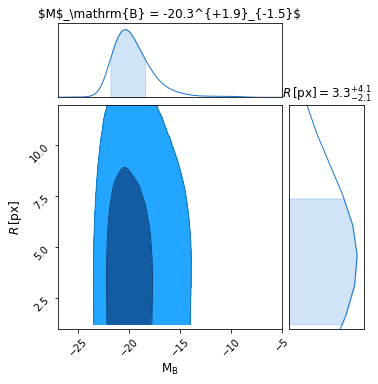

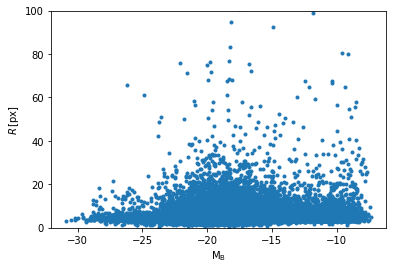

In [19]:
mask = np.isfinite(cosmos_abs_mag) & np.isfinite(cosmos['FLUX_RADIUS'])

c = ChainConsumer()
c.add_chain({r'M$_\mathrm{B}$': cosmos_abs_mag[mask], r'$R\, [\mathrm{px}]$': cosmos['FLUX_RADIUS'][mask]})
c.plotter.plot(figsize="column", display=True, extents=[(-27,-5), (1,12)], log_scales=[False, False])

plt.plot(cosmos_abs_mag, cosmos['FLUX_RADIUS'], '.')
plt.xlabel(r'M$_\mathrm{B}$')
plt.ylabel(r'$R\, [\mathrm{px}]$')
plt.ylim([-0.1,100])
#plt.xlim([-15,5])
plt.show()

### Use K-correction to calculate absolute magnitudes for sim

In [20]:
def k_correction(sed, wave_observed, redshift, filter_abs, filter_app):
    '''Calculate the k-correction between AB-magnitudes.
    sed: array_like
        Observed flux as a function of observed wavelength.
    wave_observed: array_like
        Observed wavelength in Angstrom.
    redshift: float or array_like
        Redshift of the object.
    filter_abs, filter_app: speclite response object
        The bandpasses of the K-correction
    '''
    wave_emitted = (wave_observed.T / (1+redshift)).T
    frequency_emitted = 2.99e8 / (wave_emitted*10**(-10))
    frequency_observed = 2.99e8 / (wave_observed*10**(-10))
    
    response_emitted = np.interp(wave_emitted, filter_abs.wavelength, filter_abs.response) \
                        * 2.99e8 / wave_emitted**2
    response_observed = np.interp(wave_observed, filter_app.wavelength, filter_app.response) \
                        * 2.99e8 / wave_observed**2
#     int_sed_observed = np.sum(1./frequency_observed * sed * response_observed, axis=-1)
#     int_sed_emitted = np.sum(1./frequency_emitted * sed * response_emitted, axis=-1)
    int_sed_observed = np.trapz(1./frequency_observed * sed * response_observed, frequency_observed, axis=-1)
    int_sed_emitted = np.trapz(1./frequency_emitted * sed * response_emitted, frequency_emitted, axis=-1)
    
    AB_zero = 3631 * 10**6 # in muJy and frequency space
#     norm_observed = np.sum(1./frequency_observed * AB_zero * response_observed)
#     norm_emitted = np.sum(1./frequency_emitted * AB_zero * response_emitted)
    norm_observed = np.trapz(1./frequency_observed * AB_zero * response_observed, frequency_observed, axis=-1)
    norm_emitted = np.trapz(1./frequency_emitted * AB_zero * response_emitted, frequency_emitted, axis=-1)
    
    return -2.5 * np.log10((1+redshift) * int_sed_observed/norm_observed * norm_emitted/int_sed_emitted)

def k_correction_array(sed, wave_observed, wave_emitted, redshift, filter_abs, filter_app):
    '''Calculate the k-correction between AB-magnitudes.
    sed: array_like
        Observed flux as a function of observed wavelength in micro Jy.
    wave_observed, wave_emitted: array_like
        Observed and emitted wavelength in Angstrom.
    redshift: float or array_like
        Redshift of the object.
    filter_abs, filter_app: speclite response object
        The bandpasses in the rest-fram and observed-frame of the K-correction
    '''
    frequency_emitted = 2.99e8 / (wave_emitted*10**(-10))
    frequency_observed = 2.99e8 / (wave_observed*10**(-10))
    
    response_emitted = np.interp(wave_emitted, filter_abs.wavelength, filter_abs.response) \
                        * 2.99e8 / wave_emitted**2
    response_observed = np.interp(wave_observed, filter_app.wavelength, filter_app.response) \
                        * 2.99e8 / wave_observed**2

    int_sed_observed = np.trapz(1./frequency_observed * sed * response_observed, frequency_observed, axis=-1)
    int_sed_emitted = np.trapz(1./frequency_emitted * sed * response_emitted, frequency_emitted, axis=-1)
    
    AB_zero = 3631 * 10**6 # in muJy and frequency space

    norm_observed = np.trapz(1./frequency_observed * AB_zero * response_observed, frequency_observed, axis=-1)
    norm_emitted = np.trapz(1./frequency_emitted * AB_zero * response_emitted, frequency_emitted, axis=-1)
    print(f"Shape norm_observed {norm_observed.shape}, norm_emitted {norm_emitted.shape}")
    print("Integrals: ", int_sed_observed/norm_observed * norm_emitted/int_sed_emitted)
    print("Redshifts: ", redshift)
    
    return -2.5 * np.log10((1+redshift) * int_sed_observed/norm_observed * norm_emitted/int_sed_emitted)

def k_correction_interp(kcorr_templates, kcorr_wave, redshift, filter_abs, filter_app, coeffs):
    # shape coeff (redshift, 5)
    # cause the integral ratio decreases rapidly with small redshifts
    z_grid = np.geomspace(min(redshift), max(redshift), 1000) 
    z_grid = np.geomspace(0.01, 3, 100) 
    wave_observed = kcorr_wave * (1+z_grid[:, np.newaxis])
    
    frequency_emitted = 2.99e8 / (kcorr_wave*10**(-10))
    frequency_observed = 2.99e8 / (wave_observed*10**(-10))
    print("Shape kcorr_wave: ", kcorr_wave.shape)
    print(f"Shape filter wavelength {filter_abs.wavelength.shape} and response {filter_abs.response.shape}")
    response_emitted = np.interp(kcorr_wave, filter_abs.wavelength, filter_abs.response) \
                        * 2.99e8 / kcorr_wave**2 # shape kcorr_wave
    print("Shape response emitted: ", response_emitted.shape)
    response_observed = np.interp(wave_observed, filter_app.wavelength, filter_app.response) \
                        * 2.99e8 / wave_observed**2 # shape (z_grid, kcorr_wave)
    print("Shape wave observed: ", wave_observed.shape)
    print(f"Shape filter wavelength {filter_app.wavelength.shape} and response {filter_app.response.shape}")
    print("Shape response observed: ", response_observed.shape)

    int_sed_observed = np.trapz(1./frequency_observed[..., np.newaxis] * kcorr_templates.T * 
                                response_observed[..., np.newaxis], 
                                frequency_observed[..., np.newaxis], axis=1) # shape (z_grid, coeff[0])
    print("Shape int observed: ", int_sed_observed.shape)

    int_sed_emitted = np.trapz(1./frequency_emitted[..., np.newaxis] * kcorr_templates.T * 
                               response_emitted[..., np.newaxis], 
                               frequency_emitted, axis=0) # shape coeff[0]
    print("Shape int emitted: ", int_sed_emitted.shape)
    
    AB_zero = 3631 * 10**6 # in muJy and frequency space

    norm_observed = np.trapz(1./frequency_observed * AB_zero * response_observed, frequency_observed, axis=-1) # shape z_grid
    norm_emitted = np.trapz(1./frequency_emitted * AB_zero * response_emitted, frequency_emitted, axis=-1) # shape ()
    print("Norm observed shape: ", norm_observed.shape)
    print("Norm emitted shape: ", norm_emitted.shape)
    
    
    integrals = int_sed_observed/norm_observed[:, np.newaxis] * norm_emitted/int_sed_emitted # shape: (z_grid, coeff)
    print("Shape inegrals: ", integrals.shape)
    
    int_z = np.zeros((len(coeffs[0]), len(redshift)))
    for i in range(len(coeffs[0])):
#         plt.plot(z_grid, integrals[:,i])
#         plt.xlabel('z')
#         plt.ylabel(f'Integral {i}')
# #         plt.xlim([min(redshift),max(redshift)])
# #         plt.xscale('log')
#         plt.show()
        int_z[i] = np.interp(redshift, z_grid, integrals[:,i])
    print("Shape int_z: ", int_z.shape)
    
    integrals = np.sum(coeffs*int_z.T, axis=-1) # shape redshift
    print("Shape integrals after interp: ", integrals.shape)
    print("Integrals: ", integrals)
    
    return -2.5 * np.log10((1+redshift) * integrals)

def k_correction_interp_before_int_ratio(kcorr_templates, kcorr_wave, redshift, filter_abs, filter_app, coeffs):
    # shape coeff (redshift, 5)
    # cause the integral ratio decreases rapidly with small redshifts
    z_grid = np.geomspace(min(redshift), max(redshift), 1000) 
    z_grid = np.geomspace(0.01, 3, 100) 
    wave_observed = kcorr_wave * (1+z_grid[:, np.newaxis])
    
    frequency_emitted = 2.99e8 / (kcorr_wave*10**(-10))
    frequency_observed = 2.99e8 / (wave_observed*10**(-10))

    response_emitted = np.interp(kcorr_wave, filter_abs.wavelength, filter_abs.response) \
                        * 2.99e8 / kcorr_wave**2 # shape kcorr_wave
    response_observed = np.interp(wave_observed, filter_app.wavelength, filter_app.response) \
                        * 2.99e8 / wave_observed**2 # shape (z_grid, kcorr_wave)

    int_sed_observed = np.trapz(1./frequency_observed[..., np.newaxis] * kcorr_templates.T * 
                                response_observed[..., np.newaxis], 
                                frequency_observed[..., np.newaxis], axis=1) # shape (z_grid, coeff[0])
    
    int_z_observed = np.zeros((len(coeffs[0]), len(redshift)))
    for i in range(len(coeffs[0])):
        int_z_observed[i] = np.interp(redshift, z_grid, int_sed_observed[:,i])
    int_sed_observed = np.sum(coeffs*int_z_observed.T, axis=-1)

    int_sed_emitted = np.trapz(1./frequency_emitted[..., np.newaxis] * kcorr_templates.T * 
                               response_emitted[..., np.newaxis], 
                               frequency_emitted, axis=0) # shape coeff[0]
    int_sed_emitted = np.sum(coeffs*int_sed_emitted, axis=-1)

    
    AB_zero = 3631 * 10**6 # in muJy and frequency space

    norm_observed = np.trapz(1./frequency_observed * AB_zero * response_observed, frequency_observed, axis=-1) # shape z_grid
    norm_observed = np.interp(redshift, z_grid, norm_observed)
    norm_emitted = np.trapz(1./frequency_emitted * AB_zero * response_emitted, frequency_emitted, axis=-1) # shape ()
    
    return -2.5 * np.log10((1+redshift) * int_sed_observed/norm_observed * norm_emitted/int_sed_emitted)


In [21]:
i_band = spec.load_filter('hsc2017-i')
r_band = spec.load_filter('hsc2017-r')
B_band = spec.load_filter('bessell-B')

kcorr = pyfits.open("templates/k_nmf_derived.default.fits")

kcorr_templates = kcorr[1].data
kcorr_wave = kcorr[11].data
print(kcorr_templates.shape)
# plt.plot(kcorr_wave, kcorr_templates[0,:], label="Template 1")
# # plt.plot(kcorr_wave, kcorr_templates[1,:], label="Template 2")
# # plt.plot(kcorr_wave, kcorr_templates[2,:], label="Template 3")
# plt.plot(kcorr_wave, kcorr_templates[3,:], label="Template 4")
# plt.plot(kcorr_wave, kcorr_templates[4,:], label="Template 5")
# plt.xlim([3300.,12000.])
# # plt.ylim([-1.e-9,1.e-9])
# plt.xlabel("Wavelength")
# plt.ylabel("Flux")
# plt.legend()
# plt.show()

# for i in range(5):
#     print(f"Template {i}")
#     num = len(kcorr_templates[i][kcorr_templates[i,:] < 0])
#     print("Number of values smaller than 0: ", num)
#     print("Wavelenghts where template smaller than 0: ", kcorr_wave[kcorr_templates[i,:] < 0])

    
print(sim['coeff'].shape)

for i in range(5):
    kcorr_templates[i,:] = kcorr_templates[i,:] * ((kcorr_wave*kcorr_wave*1e-10)/2.99e8) * 1e29
    
# plt.plot(kcorr_wave, kcorr_templates[0,:], label="Template 1")
# # plt.plot(kcorr_wave, kcorr_templates[1,:], label="Template 2")
# # plt.plot(kcorr_wave, kcorr_templates[2,:], label="Template 3")
# plt.plot(kcorr_wave, kcorr_templates[3,:], label="Template 4")
# plt.plot(kcorr_wave, kcorr_templates[4,:], label="Template 5")
# plt.xlim([3300.,12000.])
# # plt.ylim([-1,1.e11])
# plt.xlabel("Wavelength")
# plt.ylabel("Flux")
# plt.legend()
# plt.show()

# for i in range(5):
#     print(f"Template {i}")
#     num = len(kcorr_templates[i][kcorr_templates[i,:] < 0])
#     print("Number of values smaller than 0: ", num)
#     print("Wavelenghts where template smaller than 0: ", kcorr_wave[kcorr_templates[i,:] < 0])
    
wave_mask = (kcorr_wave*(1+max(sim['z'])) >= min(i_band.wavelength)) & (kcorr_wave <= max(i_band.wavelength))
seds = kcorr_templates[:,wave_mask]
wave_emitted = kcorr_wave[wave_mask]

# for i in range(5):
#     print(f"Template {i}")
#     num = len(seds[i][seds[i,:] < 0])
#     print("Number of values smaller than 0: ", num)
#     print("Wavelenghts where template smaller than 0: ", wave_emitted[seds[i,:] < 0])

(5, 10000)
(463122, 5)


In [22]:
num_gals = 3
sed = np.sum(seds.T*sim['coeff'][:num_gals, np.newaxis,:], axis=-1)
print("SED shape: ", sed.shape)
wave_observed = wave_emitted*(1+sim['z'][:num_gals, np.newaxis])
print("Observed Wavelenght shape: ", wave_observed.shape)
k_correct_array = k_correction_array(sed, wave_observed, wave_emitted, sim['z'][:num_gals], B_band, i_band)
print(k_correction_array(np.sum(kcorr_templates.T*sim['coeff'][:num_gals, np.newaxis,:], axis=-1), 
                         kcorr_wave*(1+sim['z'][:num_gals, np.newaxis]), 
                         kcorr_wave, sim['z'][:num_gals], B_band, i_band))

k_correct = np.zeros(num_gals)
for i in range(num_gals):
    sed = np.sum(seds.T*sim['coeff'][i,:], axis=1)
    wave = wave_emitted*(1+sim['z'][i])
    k_correct[i] = k_correction(sed, wave, sim['z'][i], B_band, i_band)
print("Difference array and loop: ", k_correct_array - k_correct)

k_correct_whole_range = np.zeros(num_gals)
for i in range(num_gals):
    sed = np.sum(kcorr_templates.T*sim['coeff'][i,:], axis=1)
    wave = kcorr_wave*(1+sim['z'][i])
    k_correct_whole_range[i] = k_correction(sed, wave, sim['z'][i], B_band, i_band)

print(k_correct_array)
print(k_correct)
print(k_correct_whole_range)

SED shape:  (3, 2381)
Observed Wavelenght shape:  (3, 2381)
Shape norm_observed (3,), norm_emitted ()
Integrals:  [0.4053014  0.98314246 0.10594134]
Redshifts:  [2.44449196 0.77961049 2.78304359]
Shape norm_observed (3,), norm_emitted ()
Integrals:  [0.4053014  0.98314246 0.10594134]
Redshifts:  [2.44449196 0.77961049 2.78304359]
[-0.36225821 -0.60735352  0.99273294]
Difference array and loop:  [ 4.20826354e-08 -6.17278897e-08  5.89839049e-08]
[-0.36225821 -0.60735352  0.99273294]
[-0.36225825 -0.60735346  0.99273289]
[-0.36225825 -0.60735346  0.99273289]


In [23]:
# k_correct_interpolated = k_correction_interp(kcorr_templates, kcorr_wave, sim['z'][:num_gals], 
#                                              B_band, i_band, sim['coeff'][:num_gals])
k_correct_interpolated = k_correction_interp(seds, wave_emitted, sim['z'][:num_gals], 
                                             B_band, i_band, sim['coeff'][:num_gals])
print("Redshifts: ", sim['z'][:num_gals])
print("K-corrections: ", k_correct_interpolated)

Shape kcorr_wave:  (2381,)
Shape filter wavelength (21,) and response (21,)
Shape response emitted:  (2381,)
Shape wave observed:  (100, 2381)
Shape filter wavelength (259,) and response (259,)
Shape response observed:  (100, 2381)
Shape int observed:  (100, 5)
Shape int emitted:  (5,)
Norm observed shape:  (100,)
Norm emitted shape:  ()
Shape inegrals:  (100, 5)
Shape int_z:  (5, 3)
Shape integrals after interp:  (3,)
Integrals:  [0.02736332 0.96181235 0.01800195]
Redshifts:  [2.44449196 0.77961049 2.78304359]
K-corrections:  [ 2.56426523 -0.58353827  2.91709788]


In [24]:
# k_correct_interpolated_before_int_ratio = k_correction_interp_before_int_ratio(seds, wave_emitted, 
#                                                                               sim['z'][:num_gals], 
#                                                                               B_band, i_band, 
#                                                                               sim['coeff'][:num_gals])
k_correct_interpolated_before_int_ratio = k_correction_interp_before_int_ratio(kcorr_templates, kcorr_wave, 
                                                                              sim['z'][:num_gals], 
                                                                              B_band, i_band, 
                                                                              sim['coeff'][:num_gals])
print(k_correct_interpolated_before_int_ratio)

[-0.36145215 -0.6074048   0.99128648]


In [25]:
print(min(kcorr_wave), kcorr_wave[0])
print(min(kcorr_wave*(1+3)), kcorr_wave[0]*(1+3))
print(max(kcorr_wave), kcorr_wave[-1])
print(max(kcorr_wave*(1+3)), kcorr_wave[-1]*(1+3))

print(max(sim['z']))

print(max(B_band.wavelength)*(4))

wave_mask = (kcorr_wave*(1+max(sim['z'])) >= min(i_band.wavelength)) & (kcorr_wave <= max(i_band.wavelength))
print(wave_mask)
print(len(kcorr_wave[wave_mask]), len(kcorr_wave))



600.25757 600.25757
2401.0303 2401.0302734375
3198626.2 3198626.2
12794505.0 12794505.0
4.499982187333243
22400.0
[False False False ... False False False]
2381 10000


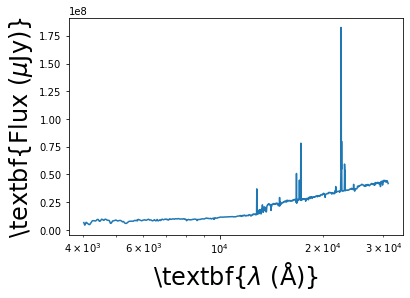

In [26]:
# check sed of sim
# sed = np.sum(seds.T*sim['coeff'][500,:], axis=1)
# print(min(sed))
# wave = kcorr_wave*(1+sim['z'][500])
wave_mask = np.where((wave_observed[0]>3300)&(wave_observed[0]<50000))[0]
sed = np.sum(seds.T*sim['coeff'][:num_gals, np.newaxis,:], axis=-1)

plt.plot(wave_observed[0], sed[0])
plt.xlabel(r'\textbf{$\lambda$ (${\rm \AA}$)}', fontsize=24)
plt.ylabel(r'\textbf{Flux ($\mu$Jy)}', fontsize=24)
plt.xscale('log')
# plt.xlim([3300.,50000.])
# plt.ylim([-40, 500])
plt.show()

In [27]:
i_band = spec.load_filter('hsc2017-i')
r_band = spec.load_filter('hsc2017-r')
B_band = spec.load_filter('bessell-B')

# abs_mag_sim_kcorrect = np.zeros(len(sim))
# k_correct = np.zeros(len(sim))
# for i in range(len(sim)):
#     sed = np.sum(kcorr_templates.T*sim['coeff'][i,:], axis=1)
#     wave = kcorr_wave*(1+sim['z'][i])
#     k_correct[i] = k_correction(sed, wave, sim['z'][i], B_band, i_band)
#     abs_mag_sim_kcorrect[i] = sim['m_hsc_true'][i,2] + sim['m_hsc_sim'][i,2] - cosmo.distmod(sim['z'][i]).value \
#                                 - k_correct[i]
k_correct_interp = k_correction_interp_before_int_ratio(kcorr_templates, kcorr_wave, sim['z'],  
                                                B_band, i_band, sim['coeff'])
abs_mag_sim_kcorrect_interp = sim['m_hsc_true'][:,2] + sim['m_hsc_sim'][:,2] - cosmo.distmod(sim['z']).value \
                                - k_correct_interp

273


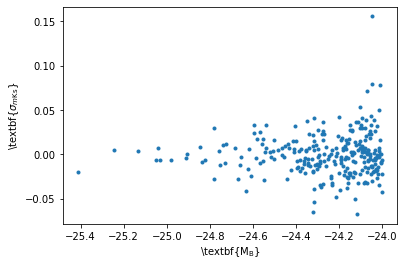

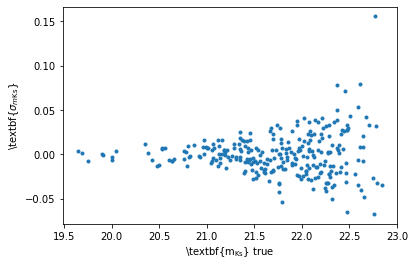

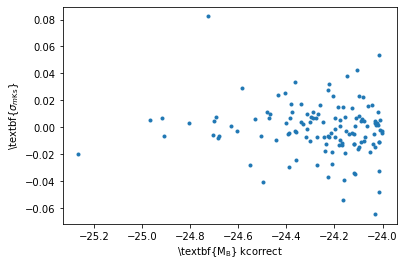

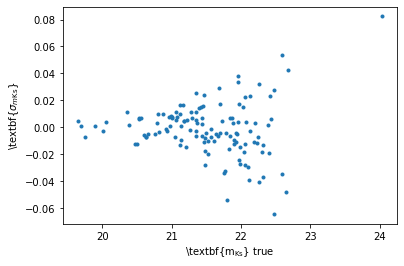

In [28]:
mask = sim['M_B'] < -24
print(len(mask[mask==True]))

plt.plot(sim['M_B'][mask], sim['m_vista_sim'][:,3][mask], '.')
plt.xlabel(r'\textbf{M$_\mathrm{B}$}')
plt.ylabel(r'\textbf{$\sigma_{m\mathrm{Ks}}$}')
plt.show()

plt.plot(sim['m_vista_true'][:,3][mask], sim['m_vista_sim'][:,3][mask], '.')
plt.xlabel(r'\textbf{m$_\mathrm{Ks}$} true')
plt.ylabel(r'\textbf{$\sigma_{m\mathrm{Ks}}$}')
plt.show()

mask = abs_mag_sim_kcorrect_interp < -24

plt.plot(abs_mag_sim_kcorrect_interp[mask], sim['m_vista_sim'][:,3][mask], '.')
plt.xlabel(r'\textbf{M$_\mathrm{B}$} kcorrect')
plt.ylabel(r'\textbf{$\sigma_{m\mathrm{Ks}}$}')
plt.show()

plt.plot(sim['m_vista_true'][:,3][mask], sim['m_vista_sim'][:,3][mask], '.')
plt.xlabel(r'\textbf{m$_\mathrm{Ks}$} true')
plt.ylabel(r'\textbf{$\sigma_{m\mathrm{Ks}}$}')
plt.show()

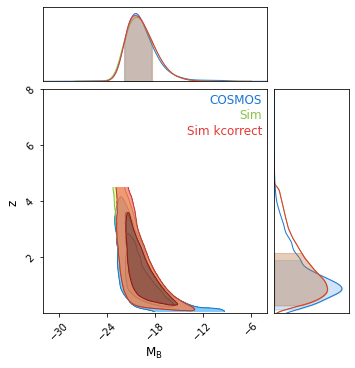

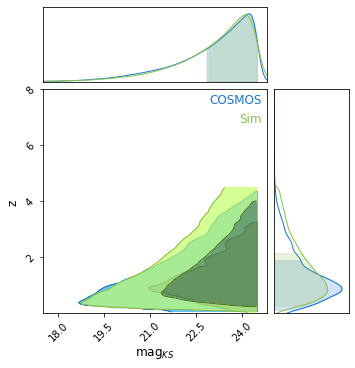

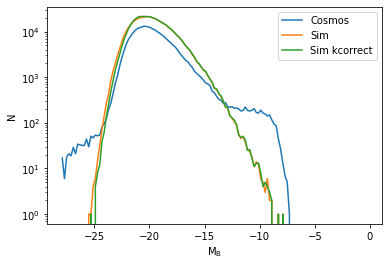

In [33]:
from chainconsumer import ChainConsumer
mask = np.isfinite(cosmos_abs_mag) #and np.isfinite(cosmos['HSC_i_FLUX_APER3']/cosmos['HSC_i_FLUXERR_APER3'])

c = ChainConsumer()
c.add_chain({r'M$_\mathrm{B}$': cosmos_abs_mag[mask], r'z': cosmos['photoz'][mask]}, name='COSMOS')
c.add_chain({r'M$_\mathrm{B}$': sim['M_B'], r'z': sim['z']}, name='Sim')
c.add_chain({r'M$_\mathrm{B}$': abs_mag_sim_kcorrect_interp, r'z': sim['z']}, name='Sim kcorrect')
c.plotter.plot(figsize="column", display=True, extents=[(-32,-4), (0,8)])


c = ChainConsumer()
c.add_chain({r'mag$_{KS}$': cosmos['UVISTA_Ks_MAG_APER3'], r'z': cosmos['photoz']}, name='COSMOS')
c.add_chain({r'mag$_{KS}$': sim['m_vista_true'][:,3] + sim['m_vista_sim'][:,3], r'z': sim['z']}, name='Sim')
c.plotter.plot(figsize="column", display=True, extents=[(17.5,24.8), (0,8)])


bins_abs_mag = np.arange(-28, 0,0.2)
bin_centers_abs_mag = bins_abs_mag[:-1] + (bins_abs_mag[-1]-bins_abs_mag[0])/(2*len(bins_abs_mag))

hist_cosmos, _ = np.histogram(cosmos_abs_mag, bins=bins_abs_mag, density=False)
hist_sim, _ = np.histogram(sim['M_B'] , bins=bins_abs_mag, density=False)
hist_sim_kcorrect, _ = np.histogram(abs_mag_sim_kcorrect_interp , bins=bins_abs_mag, density=False)
# hist_sim_will, _ = np.histogram(sim_will['M_r'] , bins=bins_abs_mag, density=False)

plt.plot(bin_centers_abs_mag, hist_cosmos, label='Cosmos')
plt.plot(bin_centers_abs_mag, hist_sim, label='Sim')
plt.plot(bin_centers_abs_mag, hist_sim_kcorrect, label='Sim kcorrect')
# plt.plot(bin_centers_abs_mag, hist_sim_will, label='Sim Will but r-band')
plt.legend()
plt.xlabel(r'M$_\mathrm{B}$')
plt.ylabel(r'N')
plt.yscale('log')
plt.show()
# plot on magnitude to signal-to-noise, conour level the numbers and same with magnitude size (cat does not include size)

In [34]:
# abs_mag_sim_will_kcorrect = np.zeros(len(sim_will))
# abs_mag_sim_will_kcorrect_r_band = np.zeros(len(sim_will))
# for i in range(len(sim_will)):
#     sed = np.sum(seds.T*sim_will['coeff'][i,:], axis=1)
#     wave = kcorr_wave*(1+sim_will['z'][i])
#     k_correct = k_correction(sed, wave, sim_will['z'][i], B_band, i_band)
#     k_correct_r = k_correction(sed, wave, sim_will['z'][i], r_band, i_band)
#     abs_mag_sim_will_kcorrect[i] = sim_will['m_hsc_true'][i,2] + sim_will['m_hsc_sim'][i,2] - cosmo.distmod(sim_will['z'][i]).value \
#                                 - k_correct
#     abs_mag_sim_will_kcorrect_r_band[i] = sim_will['m_hsc_true'][i,2] + sim_will['m_hsc_sim'][i,2] - cosmo.distmod(sim_will['z'][i]).value \
#                                 - k_correct_r

In [35]:
print(len(abs_mag_sim_kcorrect_interp))
print(abs_mag_sim_kcorrect_interp)
# print(len(abs_mag_sim_will_kcorrect))
# print(abs_mag_sim_will_kcorrect)

463122
[-20.64969118 -18.7411284  -21.65453446 ... -21.77533227 -18.1951307
 -21.32531652]


### Compare all Absolute Magnitudes

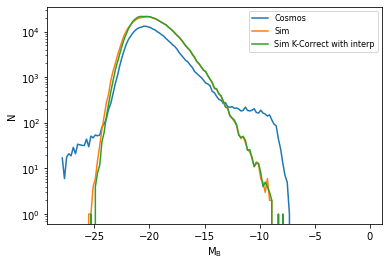

In [36]:
bins_abs_mag = np.arange(-28, 0,0.2)
bin_centers_abs_mag = bins_abs_mag[:-1] + (bins_abs_mag[-1]-bins_abs_mag[0])/(2*len(bins_abs_mag))

hist_cosmos, _ = np.histogram(cosmos_abs_mag, bins=bins_abs_mag, density=False)
hist_sim, _ = np.histogram(sim['M_B'] , bins=bins_abs_mag, density=False)
# hist_sim_will, _ = np.histogram(sim_will['M_r'] , bins=bins_abs_mag, density=False)
# hist_sim_kcorrect, _ = np.histogram(abs_mag_sim_kcorrect, bins=bins_abs_mag, density=False)
hist_sim_kcorrect_interp, _ = np.histogram(abs_mag_sim_kcorrect_interp, bins=bins_abs_mag, density=False)
# hist_sim_will_kcorrect, _ = np.histogram(abs_mag_sim_will_kcorrect, bins=bins_abs_mag, density=False)
# hist_sim_will_kcorrect_r_band, _ = np.histogram(abs_mag_sim_will_kcorrect_r_band, bins=bins_abs_mag, density=False)

plt.plot(bin_centers_abs_mag, hist_cosmos, label='Cosmos')
plt.plot(bin_centers_abs_mag, hist_sim, label='Sim')
# plt.plot(bin_centers_abs_mag, hist_sim_kcorrect, label='Sim K-Correct')
plt.plot(bin_centers_abs_mag, hist_sim_kcorrect_interp, label='Sim K-Correct with interp')
# plt.plot(bin_centers_abs_mag, hist_sim_will, label='Sim Will but r-band')
# plt.plot(bin_centers_abs_mag, hist_sim_will_kcorrect, label='Sim Will K-Correct')
# plt.plot(bin_centers_abs_mag, hist_sim_will_kcorrect_r_band, label='Sim Will K-Correct but r-band')
plt.legend(loc='upper right', fontsize=8)
plt.xlabel(r'M$_\mathrm{B}$')
plt.ylabel(r'N')
plt.yscale('log')
plt.show()
# why does cosmos have a bump at faint magnitudes but Sim K-correct does not?

In [37]:
def Vmax_kcorrect_array(mag_lim, abs_mag, dm, vol, k_correct, z_ref):
    # compute the maximum observable volume an object has within the defined bin
    mag = abs_mag[:,np.newaxis] + dm + k_correct[:,np.newaxis] + 2.5*np.log10(1+z_ref[:,np.newaxis])
    col_indices = mag.shape[-1] - np.argmax(mag[..., ::-1] < mag_lim, axis=-1) - 1
    row_indices = np.linspace(0, len(abs_mag)-1, len(abs_mag))
    vmax = vol[col_indices] - vol[0]
    return vmax

def get_dm(z, cosmo):
    return 5*np.log10(cosmo.luminosity_distance(z).value * 1e5) - 2.5*np.log10(1+z)

def get_bin_weights_kcorrect_array(z, cosmo, area, zbin, abs_mag, maglim, k_correct):
    # compute Vmax for each object, based on their mag and survey maglim.
    # Objects lying outside the redshift intervals have weight = 0.
    # Set-up cosmo arrays
    zarr = np.arange(zbin[0], zbin[1]+(zbin[1]-zbin[0])/1000, (zbin[1]-zbin[0])/1000)
    # set up an array of dist. moduli - perhaps should have done this earlier in the code.
    dm = get_dm(zarr, cosmo)
    vol = (area/41252.96) * cosmo.comoving_volume(zarr).value

    weights = np.zeros_like(z)
    sel = np.where((z>=zbin[0])&(z<zbin[1]))[0]
    weights[sel] = 1./Vmax_kcorrect_array(maglim, abs_mag[sel], dm, vol, k_correct[sel], z[sel])
    weights[np.isinf(weights)] = 0.
    return weights

def sim_hist(z_grid, redshift, cosmology, sky_area, magnitude, bins):
    z_mask = np.logical_and(redshift >= np.min(z_grid), redshift < np.max(z_grid))
    dV_dz = (cosmology.differential_comoving_volume(z_grid) * sky_area).to_value('Mpc3')
    dV = np.trapz(dV_dz, z_grid)
    dM = (np.max(bins)-np.min(bins)) / (np.size(bins)-1)
    phi = np.histogram(magnitude[z_mask], bins=bins)[0] / dV / dM
    return phi

def effective_weight(inv_vmax, completeness_weights=None):
    # compute the effective weight in a luminosity bin
    if completeness_weights is None:
        weff = np.sum(inv_vmax**2) / np.sum(inv_vmax)
    else:
        weff = np.sum((completeness_weights*inv_vmax)**2) / np.sum(completeness_weights*inv_vmax)
    return weff

def effective_number(inv_vmax, weff, completeness_weights=None):
    if completeness_weights is None:
        Neff = np.sum(inv_vmax) / weff
    else:
        Neff = np.sum(completeness_weights*inv_vmax) / weff
    return Neff

def Vmax_array(z, mag_lim, mag, zarr, dm, vol):
    # compute the maximum observable volume an object has within the defined bin
    dz = zarr[1] - zarr[0]
    m_diff = mag_lim - mag # how far above the flux limit is it?
    z_dz = z+dz/2
    # get the last column indices of len(zarr) where z_dz > zarr
    # that corresponds to the first index minus 1 where z_arr >= z_dz
    col_indices = np.argmax(z_dz[:, np.newaxis] <= zarr, axis=-1) - 1
    row_indices = np.linspace(0, len(z_dz)-1, len(z_dz))
    max_z_indx = np.argmax((dm[col_indices]+m_diff)[:, np.newaxis] <= dm, axis=-1) - 1
    vmax = vol[max_z_indx] - vol[0]
    return vmax

def get_dm(z, cosmo):
    return 5*np.log10(cosmo.luminosity_distance(z).value * 1e5) - 2.5*np.log10(1+z)

def get_bin_weights_array(z, cosmo, area, zbin, mag, maglim):
    # compute Vmax for each object, based on their mag and survey maglim.
    # Objects lying outside the redshift intervals have weight = 0.
    # Set-up cosmo arrays
    zarr = np.arange(zbin[0], zbin[1]+(zbin[1]-zbin[0])/1000, (zbin[1]-zbin[0])/1000)
    # set up an array of dist. moduli - perhaps should have done this earlier in the code.
    dm = get_dm(zarr, cosmo)
    vol = (area/41252.96) * cosmo.comoving_volume(zarr).value

    weights = np.zeros_like(z)
    sel = np.where((z>=zbin[0])&(z<zbin[1]))[0]
    weights[sel] = 1./Vmax_array(z[sel], maglim, mag[sel], zarr, dm,
                                     vol)
    weights[np.isinf(weights)] = 0.
    return weights

In [38]:
from astropy.units import Quantity
redshift_range = [0.01,3]
z_grid = np.linspace(redshift_range[0], redshift_range[1], 100)
bins = np.linspace(-27, -12, 50)
bin_centers = (bins[:-1] + bins[1:])/2
sky_area = Quantity(1.27, "deg2")
cosmology = FlatLambdaCDM(H0=70, Om0=0.3)

In [39]:
hist_sim = sim_hist(z_grid, sim['z'], cosmology, sky_area, sim['M_B'], bins)
# hist_sim_kcorrect = sim_hist(z_grid, sim['z'], cosmology, sky_area, abs_mag_sim_kcorrect, bins)
hist_sim_kcorrect_interp = sim_hist(z_grid, sim['z'], cosmology, sky_area, abs_mag_sim_kcorrect_interp, bins)

weights_sim = get_bin_weights_kcorrect_array(sim['z'], cosmology, 1.27, 
                                              redshift_range, sim['M_B'], 24.5, k_correct_interp)
# weights_sim_kcorrect = get_bin_weights_kcorrect_array(sim['z'], cosmology, 1.27, 
#                                               redshift_range, abs_mag_sim_kcorrect, 24.5, k_correct)
weights_sim_kcorrect_interp = get_bin_weights_kcorrect_array(sim['z'], cosmology, 1.27, 
                                              redshift_range, abs_mag_sim_kcorrect_interp, 24.5, k_correct_interp)

weights_sim_array = get_bin_weights_array(sim['z'], cosmology, 1.27, 
                                              redshift_range, sim['m_vista_true'][:,3]+sim['m_vista_sim'][:,3], 24.5)

phi_sim = np.histogram(sim['M_B'], weights=weights_sim, bins=bins)[0]
# phi_sim_kcorrect = np.histogram(abs_mag_sim_kcorrect, weights=weights_sim_kcorrect, bins=bins)[0]
phi_sim_kcorrect_interp = np.histogram(abs_mag_sim_kcorrect_interp, weights=weights_sim_kcorrect_interp, bins=bins)[0]
phi_sim_array = np.histogram(sim['M_B'], weights=weights_sim_array, bins=bins)[0]
# phi_sim_array_kcorrect = np.histogram(abs_mag_sim_kcorrect, weights=weights_sim_array, bins=bins)[0]
phi_sim_array_kcorrect_interp = np.histogram(abs_mag_sim_kcorrect_interp, weights=weights_sim_array, bins=bins)[0]

bin_widths = bins[1:] - bins[:-1]
phi_sim = phi_sim / bin_widths
# phi_sim_kcorrect = phi_sim_kcorrect / bin_widths
phi_sim_kcorrect_interp = phi_sim_kcorrect_interp / bin_widths
phi_sim_array = phi_sim_array / bin_widths
# phi_sim_array_kcorrect = phi_sim_array_kcorrect / bin_widths
phi_sim_array_kcorrect_interp = phi_sim_array_kcorrect_interp / bin_widths
Mmid = (bins[1:] + bins[:-1])/2.

# calculate errors 
weff = np.ones_like(phi_sim)
Neff = np.ones_like(phi_sim)
for lbin in range(len(bins)-1):
    # Following Weigel+15
    mask = np.where((sim['M_B']>=bins[lbin])&(sim['M_B']<bins[lbin+1]))[0]
    weff[lbin] = effective_weight(weights_sim[mask])
    Neff[lbin] = effective_number(weights_sim[mask], weff[lbin])
phi_err_up_sim = weff * (Neff + np.sqrt(Neff+0.75) + 1) / bin_widths - phi_sim
phi_err_dn_sim = phi_sim - weff * (Neff - np.sqrt(Neff-0.25)) / bin_widths
# handle cases where N is zero - upper limit is 0.814 / max(Vmax)
phi_err_dn_sim[np.isnan(phi_err_dn_sim)] = 0.
phi_err_up_sim[np.isnan(phi_err_up_sim)] = 0.814 * np.min(weights_sim[weights_sim>0.])

# weff_sim = np.ones_like(phi_sim_kcorrect)
# Neff_sim = np.ones_like(phi_sim_kcorrect)
# for lbin in range(len(bins)-1):
#     # Following Weigel+15
#     mask = np.where((abs_mag_sim_kcorrect>=bins[lbin])&(abs_mag_sim_kcorrect<bins[lbin+1]))[0]
#     weff_sim[lbin] = effective_weight(weights_sim_kcorrect[mask])
#     Neff_sim[lbin] = effective_number(weights_sim_kcorrect[mask], weff_sim[lbin])
# phi_err_up_sim_kcorrect = weff_sim * (Neff_sim + np.sqrt(Neff_sim+0.75) + 1) / bin_widths - phi_sim_kcorrect
# phi_err_dn_sim_kcorrect = phi_sim_kcorrect - weff_sim * (Neff_sim - np.sqrt(Neff_sim-0.25)) / bin_widths
# # handle cases where N is zero - upper limit is 0.814 / max(Vmax)
# phi_err_dn_sim_kcorrect[np.isnan(phi_err_dn_sim_kcorrect)] = 0.
# phi_err_up_sim_kcorrect[np.isnan(phi_err_up_sim_kcorrect)] = 0.814 * np.min(weights_sim_kcorrect[weights_sim_kcorrect>0.])

weff_sim = np.ones_like(phi_sim_kcorrect_interp)
Neff_sim = np.ones_like(phi_sim_kcorrect_interp)
for lbin in range(len(bins)-1):
    # Following Weigel+15
    mask = np.where((abs_mag_sim_kcorrect_interp>=bins[lbin])&(abs_mag_sim_kcorrect_interp<bins[lbin+1]))[0]
    weff_sim[lbin] = effective_weight(weights_sim_kcorrect_interp[mask])
    Neff_sim[lbin] = effective_number(weights_sim_kcorrect_interp[mask], weff_sim[lbin])
phi_err_up_sim_kcorrect_interp = weff_sim * (Neff_sim + np.sqrt(Neff_sim+0.75) + 1) / bin_widths - phi_sim_kcorrect_interp
phi_err_dn_sim_kcorrect_interp = phi_sim_kcorrect_interp - weff_sim * (Neff_sim - np.sqrt(Neff_sim-0.25)) / bin_widths
# handle cases where N is zero - upper limit is 0.814 / max(Vmax)
phi_err_dn_sim_kcorrect_interp[np.isnan(phi_err_dn_sim_kcorrect_interp)] = 0.
phi_err_up_sim_kcorrect_interp[np.isnan(phi_err_up_sim_kcorrect_interp)] = 0.814 * np.min(weights_sim_kcorrect_interp[weights_sim_kcorrect_interp>0.])


weff_sim = np.ones_like(phi_sim_array)
Neff_sim = np.ones_like(phi_sim_array)
for lbin in range(len(bins)-1):
    # Following Weigel+15
    mask = np.where((sim['M_B']>=bins[lbin])&(sim['M_B']<bins[lbin+1]))[0]
    weff_sim[lbin] = effective_weight(weights_sim_array[mask])
    Neff_sim[lbin] = effective_number(weights_sim_array[mask], weff_sim[lbin])
phi_err_up_sim_array = weff_sim * (Neff_sim + np.sqrt(Neff_sim+0.75) + 1) / bin_widths - phi_sim_array
phi_err_dn_sim_array = phi_sim_array - weff_sim * (Neff_sim - np.sqrt(Neff_sim-0.25)) / bin_widths
# handle cases where N is zero - upper limit is 0.814 / max(Vmax)
phi_err_dn_sim_array[np.isnan(phi_err_dn_sim_array)] = 0.
phi_err_up_sim_array[np.isnan(phi_err_up_sim_array)] = 0.814 * np.min(weights_sim_array[weights_sim_array>0.])


# weff_sim = np.ones_like(phi_sim_array_kcorrect)
# Neff_sim = np.ones_like(phi_sim_array_kcorrect)
# for lbin in range(len(bins)-1):
#     # Following Weigel+15
#     mask = np.where((abs_mag_sim_kcorrect>=bins[lbin])&(abs_mag_sim_kcorrect<bins[lbin+1]))[0]
#     weff_sim[lbin] = effective_weight(weights_sim_array[mask])
#     Neff_sim[lbin] = effective_number(weights_sim_array[mask], weff_sim[lbin])
# phi_err_up_sim_array_kcorrect = weff_sim * (Neff_sim + np.sqrt(Neff_sim+0.75) + 1) / bin_widths - phi_sim_array_kcorrect
# phi_err_dn_sim_array_kcorrect = phi_sim_array_kcorrect - weff_sim * (Neff_sim - np.sqrt(Neff_sim-0.25)) / bin_widths
# # handle cases where N is zero - upper limit is 0.814 / max(Vmax)
# phi_err_dn_sim_array_kcorrect[np.isnan(phi_err_dn_sim_array_kcorrect)] = 0.
# phi_err_up_sim_array_kcorrect[np.isnan(phi_err_up_sim_array_kcorrect)] = 0.814 * np.min(weights_sim_array[weights_sim_array>0.])


weff_sim = np.ones_like(phi_sim_array_kcorrect_interp)
Neff_sim = np.ones_like(phi_sim_array_kcorrect_interp)
for lbin in range(len(bins)-1):
    # Following Weigel+15
    mask = np.where((abs_mag_sim_kcorrect_interp>=bins[lbin])&(abs_mag_sim_kcorrect_interp<bins[lbin+1]))[0]
    weff_sim[lbin] = effective_weight(weights_sim_array[mask])
    Neff_sim[lbin] = effective_number(weights_sim_array[mask], weff_sim[lbin])
phi_err_up_sim_array_kcorrect_interp = weff_sim * (Neff_sim + np.sqrt(Neff_sim+0.75) + 1) / bin_widths - phi_sim_array_kcorrect_interp
phi_err_dn_sim_array_kcorrect_interp = phi_sim_array_kcorrect_interp - weff_sim * (Neff_sim - np.sqrt(Neff_sim-0.25)) / bin_widths
# handle cases where N is zero - upper limit is 0.814 / max(Vmax)
phi_err_dn_sim_array_kcorrect_interp[np.isnan(phi_err_dn_sim_array_kcorrect_interp)] = 0.
phi_err_up_sim_array_kcorrect_interp[np.isnan(phi_err_up_sim_array_kcorrect_interp)] = 0.814 * np.min(weights_sim_array[weights_sim_array>0.])


/users/psudek/virtual_environments/sbi_env/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in true_divide
/users/psudek/virtual_environments/sbi_env/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in double_scalars


In [40]:
print(weights_sim_array)

[3.01639168e-08 8.80431832e-08 3.01639168e-08 ... 3.01639168e-08
 6.08756792e-08 3.01639168e-08]


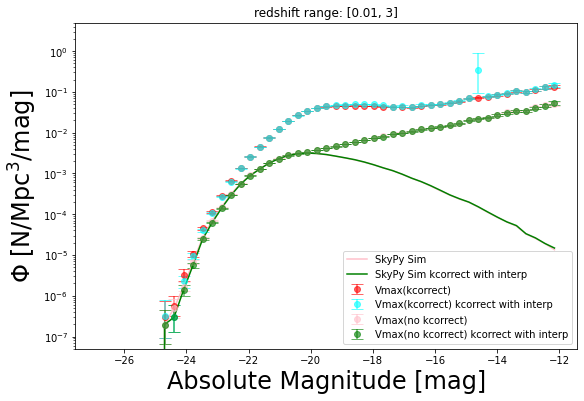

In [41]:
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)
ax.set_xlabel(r"Absolute Magnitude [mag]", fontsize=24)
ax.set_ylabel(r'$\Phi$ [N/Mpc$^3$/mag]', fontsize=24)
#ax.set_xlim([-27,-12.5])
#ax.set_ylim([5.e-7,0.15])
ax.set_yscale('log')
ax.errorbar(Mmid, phi_sim, yerr=np.array([phi_err_dn_sim,phi_err_up_sim]), alpha=0.6,
            fmt='o', capsize=6, label="Vmax(kcorrect)", color='red')
# ax.errorbar(Mmid, phi_sim_kcorrect, yerr=np.array([phi_err_dn_sim_kcorrect,phi_err_up_sim_kcorrect]), alpha=0.6,
#             fmt='o', capsize=6, label="Vmax(kcorrect) kcorrect", color='orange')
ax.errorbar(Mmid, phi_sim_kcorrect_interp, yerr=np.array([phi_err_dn_sim_kcorrect_interp,phi_err_up_sim_kcorrect_interp]), alpha=0.6,
            fmt='o', capsize=6, label="Vmax(kcorrect) kcorrect with interp", color='cyan')
ax.errorbar(Mmid, phi_sim_array, yerr=np.array([phi_err_dn_sim_array,phi_err_up_sim_array]), alpha=0.6,
            fmt='o', capsize=6, label="Vmax(no kcorrect)", color='pink')
# ax.errorbar(Mmid, phi_sim_array_kcorrect, yerr=np.array([phi_err_dn_sim_array_kcorrect,phi_err_up_sim_array_kcorrect]), alpha=0.6,
#             fmt='o', capsize=6, label="Vmax(no kcorrect) kcorrect", color='yellow')
ax.errorbar(Mmid, phi_sim_array_kcorrect_interp, yerr=np.array([phi_err_dn_sim_array_kcorrect_interp,phi_err_up_sim_array_kcorrect_interp]), alpha=0.6,
            fmt='o', capsize=6, label="Vmax(no kcorrect) kcorrect with interp", color='green')
ax.plot(Mmid, hist_sim, label="SkyPy Sim", color='pink')
# ax.plot(Mmid, hist_sim_kcorrect, label="SkyPy Sim kcorrect", color='yellow')
ax.plot(Mmid, hist_sim_kcorrect_interp, label="SkyPy Sim kcorrect with interp", color='green')
ax.set_ylim([5.e-8, 5])
plt.legend()
plt.title(f'redshift range: {redshift_range}')
plt.show()

In [42]:
redshift_range = [0.01,4.5]
z_grid = np.linspace(redshift_range[0], redshift_range[1], 100)
bins = np.linspace(-27, -12, 50)
bin_centers = (bins[:-1] + bins[1:])/2
sky_area = Quantity(1.27, "deg2")
cosmology = FlatLambdaCDM(H0=70, Om0=0.3)

pipeline = Pipeline.read("COSMOS2020_constant.yaml")
pipeline.execute()
sim_sf = pipeline['SF']
sim_q = pipeline['Q']
sim_constant = np.concatenate((sim_sf, sim_q))
print(len(sim))
mask = np.where((sim_constant['m_vista_true'][:,3]+sim_constant['m_vista_sim'][:,3]<30)&(sim_constant['z']>0))[0]
sim_constant = sim_constant[mask]
print(len(sim))


hist_sim_constant = sim_hist(z_grid, sim_constant['z'], cosmology, sky_area, sim_constant['M_B'], bins)

INFO:skypy.pipeline:Setting cosmology
INFO:skypy.pipeline:Calling FlatLambdaCDM
INFO:skypy.pipeline:Generating mag_lim
INFO:skypy.pipeline:Generating sky_area
INFO:skypy.pipeline:Generating filters
INFO:skypy.pipeline:Generating bands_hsc
INFO:skypy.pipeline:Generating bands_vista
INFO:skypy.pipeline:Generating mag_limits
INFO:skypy.pipeline:Generating z_range
INFO:skypy.pipeline:Calling geomspace
INFO:skypy.pipeline:Generating SF
INFO:skypy.pipeline:Calling Table
INFO:skypy.pipeline:Generating Q
INFO:skypy.pipeline:Calling Table
INFO:skypy.pipeline:Generating SF.z, M_B
INFO:skypy.pipeline:Calling schechter_lf
INFO:skypy.pipeline:Generating Q.z, M_B
INFO:skypy.pipeline:Calling schechter_lf
INFO:skypy.pipeline:Generating SF.coeff
INFO:skypy.pipeline:Calling zeros_like
INFO:skypy.pipeline:Calling dirichlet_coefficients
INFO:skypy.pipeline:Generating Q.coeff
INFO:skypy.pipeline:Calling zeros_like
INFO:skypy.pipeline:Calling dirichlet_coefficients
INFO:skypy.pipeline:Generating SF.sm
INFO:

463122
463122


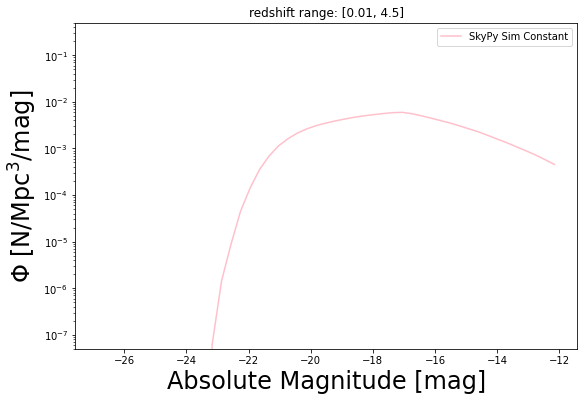

In [43]:
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)
ax.set_xlabel(r"Absolute Magnitude [mag]", fontsize=24)
ax.set_ylabel(r'$\Phi$ [N/Mpc$^3$/mag]', fontsize=24)
#ax.set_xlim([-27,-12.5])
#ax.set_ylim([5.e-7,0.15])
ax.set_yscale('log')
ax.plot(Mmid, hist_sim_constant, label="SkyPy Sim Constant", color='pink')

ax.set_ylim([5.e-8, 5.e-1])
plt.legend()
plt.title(f'redshift range: {redshift_range}')
plt.show()

In [44]:
# only star forming galaxies
from astropy.units import Quantity
redshift_range = [3.2,3.4]
z_grid = np.linspace(redshift_range[0], redshift_range[1], 100)
bins = np.linspace(-27, -12, 50)
bin_centers = (bins[:-1] + bins[1:])/2
sky_area = Quantity(1.27, "deg2")
cosmology = FlatLambdaCDM(H0=70, Om0=0.3)

pipeline = Pipeline.read("COSMOS2020_tortorelli2021.yaml")
pipeline.execute()
sim_sf = pipeline['SF']
sim_q = pipeline['Q']
# sim_constant = np.concatenate((sim_sf, sim_q))
sim_constant = sim_sf
print(len(sim_constant))
mask = np.where((sim_constant['m_vista_true'][:,3]+sim_constant['m_vista_sim'][:,3]<24.5)&(sim_constant['z']>0))[0]
sim_constant = sim_constant[mask]
print(len(sim_constant))


hist_sim_constant = sim_hist(z_grid, sim_constant['z'], cosmology, sky_area, sim_constant['M_B'], bins)

INFO:skypy.pipeline:Setting cosmology
INFO:skypy.pipeline:Calling FlatLambdaCDM
INFO:skypy.pipeline:Generating mag_lim
INFO:skypy.pipeline:Generating sky_area
INFO:skypy.pipeline:Generating filters
INFO:skypy.pipeline:Generating bands_hsc
INFO:skypy.pipeline:Generating bands_vista
INFO:skypy.pipeline:Generating mag_limits
INFO:skypy.pipeline:Generating z_range
INFO:skypy.pipeline:Calling geomspace
INFO:skypy.pipeline:Generating SF
INFO:skypy.pipeline:Calling Table
INFO:skypy.pipeline:Generating Q
INFO:skypy.pipeline:Calling Table
INFO:skypy.pipeline:Generating SF.z, M_B
INFO:skypy.pipeline:Calling Linear1D
INFO:skypy.pipeline:Calling Exponential1D
INFO:skypy.pipeline:Calling schechter_lf
INFO:skypy.pipeline:Generating Q.z, M_B
INFO:skypy.pipeline:Calling Linear1D
INFO:skypy.pipeline:Calling Exponential1D
INFO:skypy.pipeline:Calling schechter_lf
INFO:skypy.pipeline:Generating SF.coeff
INFO:skypy.pipeline:Calling zeros_like
INFO:skypy.pipeline:Calling dirichlet_coefficients
INFO:skypy.pi

563846
399595


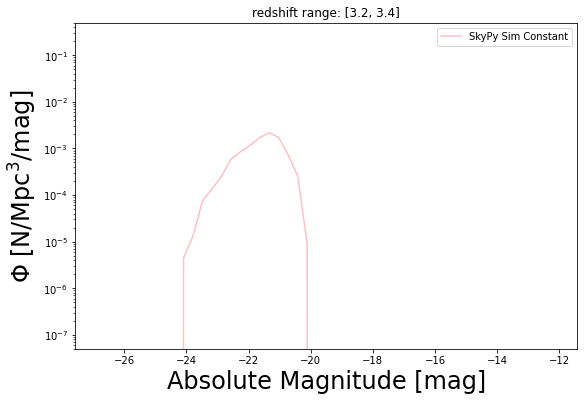

In [45]:
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)
ax.set_xlabel(r"Absolute Magnitude [mag]", fontsize=24)
ax.set_ylabel(r'$\Phi$ [N/Mpc$^3$/mag]', fontsize=24)
#ax.set_xlim([-27,-12.5])
#ax.set_ylim([5.e-7,0.15])
ax.set_yscale('log')
ax.plot(bin_centers, hist_sim_constant, label="SkyPy Sim Constant", color='pink')

ax.set_ylim([5.e-8, 5.e-1])
plt.legend()
plt.title(f'redshift range: {redshift_range}')
plt.show()

## Compare Data to Sim in redshift bins

Here, I compare the data sims with different `a_{\mathrm{m,SF}}` in different redshift bins. I want to see how sensitive the lum funtion in these bins is to `a_{\mathrm{m,SF}}`.

In this way I also want to find a good choice of redshift and magnitude bins to fit `a_{\mathrm{m,SF}}`.

In [46]:
def get_schechter_z_bin(z, M, M_bins, z_min, z_max):
    # return the schechter function as the number of galaxies in the given
    # magnitude bins (M_bins) and in the given redshift range
    z_help = np.linspace(z_min, z_max, 100000)
    z_mask = np.logical_and(z >= z_min, z < z_max)
    dV_dz = (cosmo.differential_comoving_volume(z_help) \
                * sky_area).to_value('Mpc3')
    dV = np.trapz(dV_dz, z_help)
    dM = (np.max(M_bins)-np.min(M_bins)) / (np.size(M_bins)-1)
    phi = np.histogram(M[z_mask], bins=M_bins)[0] / dV / dM

    return phi

In [51]:
sim_dic = {}
a_params = [-0.439, -0.439, -1.5, -0.02]
pipeline = Pipeline.read("COSMOS2020_tortorelli2021.yaml")
parameter_dic = pipeline[0].copy()

for (i,a) in enumerate(a_params):
    parameter_dic['a_m_SF'] = a
    print(parameter_dic)
    pipeline.execute(parameter_dic)
    sim_sf = pipeline['SF']
    sim_q = pipeline['Q']
    sim = np.concatenate((sim_sf, sim_q))
    mask = np.where((sim['m_vista_true'][:,3]+sim['m_vista_sim'][:,3]<24.5)&(sim['z']>0))[0]
    sim = sim[mask]
    k_correct_interp = k_correction_interp_before_int_ratio(kcorr_templates, kcorr_wave, sim['z'],  
                                                B_band, i_band, sim['coeff'])
    abs_mag_sim_kcorrect_interp = sim['m_hsc_true'][:,2] + sim['m_hsc_sim'][:,2] - cosmo.distmod(sim['z']).value \
                                - k_correct_interp
    
    sim_dic[str(i)] = (sim['z'], abs_mag_sim_kcorrect_interp)
print(sim_dic)

INFO:skypy.pipeline:Setting cosmology
INFO:skypy.pipeline:Calling FlatLambdaCDM
INFO:skypy.pipeline:Generating mag_lim
INFO:skypy.pipeline:Generating sky_area
INFO:skypy.pipeline:Generating filters
INFO:skypy.pipeline:Generating bands_hsc
INFO:skypy.pipeline:Generating bands_vista
INFO:skypy.pipeline:Generating mag_limits
INFO:skypy.pipeline:Generating z_range
INFO:skypy.pipeline:Calling geomspace
INFO:skypy.pipeline:Generating SF
INFO:skypy.pipeline:Calling Table
INFO:skypy.pipeline:Generating Q
INFO:skypy.pipeline:Calling Table
INFO:skypy.pipeline:Generating SF.z, M_B
INFO:skypy.pipeline:Calling Linear1D
INFO:skypy.pipeline:Calling Exponential1D
INFO:skypy.pipeline:Calling schechter_lf


{'a_m_SF': -0.439, 'b_m_SF': -20.623, 'a_phi_SF': -0.088, 'b_phi_SF': 0.004245, 'a_m_Q': -0.697, 'b_m_Q': -20.372, 'a_phi_Q': -0.836, 'b_phi_Q': 0.005169, 'a_phi-1_SF': -11.36364, 'a_phi-1_Q': -1.19617, 'alpha_SF': -1.3, 'alpha_Q': -0.5}


INFO:skypy.pipeline:Generating Q.z, M_B
INFO:skypy.pipeline:Calling Linear1D
INFO:skypy.pipeline:Calling Exponential1D
INFO:skypy.pipeline:Calling schechter_lf
INFO:skypy.pipeline:Generating SF.coeff
INFO:skypy.pipeline:Calling zeros_like
INFO:skypy.pipeline:Calling dirichlet_coefficients
INFO:skypy.pipeline:Generating Q.coeff
INFO:skypy.pipeline:Calling zeros_like
INFO:skypy.pipeline:Calling dirichlet_coefficients
INFO:skypy.pipeline:Generating SF.sm
INFO:skypy.pipeline:Calling stellar_mass
INFO:skypy.pipeline:Generating Q.sm
INFO:skypy.pipeline:Calling stellar_mass
INFO:skypy.pipeline:Generating SF.m_hsc_true
INFO:skypy.pipeline:Calling apparent_magnitudes
INFO:skypy.pipeline:Generating SF.m_vista_true
INFO:skypy.pipeline:Calling apparent_magnitudes
INFO:skypy.pipeline:Generating Q.m_hsc_true
INFO:skypy.pipeline:Calling apparent_magnitudes
INFO:skypy.pipeline:Generating Q.m_vista_true
INFO:skypy.pipeline:Calling apparent_magnitudes
INFO:skypy.pipeline:Generating SF.m_hsc_sim, hsc_sig

{'a_m_SF': -0.439, 'b_m_SF': -20.623, 'a_phi_SF': -0.088, 'b_phi_SF': 0.004245, 'a_m_Q': -0.697, 'b_m_Q': -20.372, 'a_phi_Q': -0.836, 'b_phi_Q': 0.005169, 'a_phi-1_SF': -11.36364, 'a_phi-1_Q': -1.19617, 'alpha_SF': -1.3, 'alpha_Q': -0.5}


INFO:skypy.pipeline:Generating Q.z, M_B
INFO:skypy.pipeline:Calling Linear1D
INFO:skypy.pipeline:Calling Exponential1D
INFO:skypy.pipeline:Calling schechter_lf
INFO:skypy.pipeline:Generating SF.coeff
INFO:skypy.pipeline:Calling zeros_like
INFO:skypy.pipeline:Calling dirichlet_coefficients
INFO:skypy.pipeline:Generating Q.coeff
INFO:skypy.pipeline:Calling zeros_like
INFO:skypy.pipeline:Calling dirichlet_coefficients
INFO:skypy.pipeline:Generating SF.sm
INFO:skypy.pipeline:Calling stellar_mass
INFO:skypy.pipeline:Generating Q.sm
INFO:skypy.pipeline:Calling stellar_mass
INFO:skypy.pipeline:Generating SF.m_hsc_true
INFO:skypy.pipeline:Calling apparent_magnitudes
INFO:skypy.pipeline:Generating SF.m_vista_true
INFO:skypy.pipeline:Calling apparent_magnitudes
INFO:skypy.pipeline:Generating Q.m_hsc_true
INFO:skypy.pipeline:Calling apparent_magnitudes
INFO:skypy.pipeline:Generating Q.m_vista_true
INFO:skypy.pipeline:Calling apparent_magnitudes
INFO:skypy.pipeline:Generating SF.m_hsc_sim, hsc_sig

{'a_m_SF': -1.5, 'b_m_SF': -20.623, 'a_phi_SF': -0.088, 'b_phi_SF': 0.004245, 'a_m_Q': -0.697, 'b_m_Q': -20.372, 'a_phi_Q': -0.836, 'b_phi_Q': 0.005169, 'a_phi-1_SF': -11.36364, 'a_phi-1_Q': -1.19617, 'alpha_SF': -1.3, 'alpha_Q': -0.5}


INFO:skypy.pipeline:Generating Q.z, M_B
INFO:skypy.pipeline:Calling Linear1D
INFO:skypy.pipeline:Calling Exponential1D
INFO:skypy.pipeline:Calling schechter_lf
INFO:skypy.pipeline:Generating SF.coeff
INFO:skypy.pipeline:Calling zeros_like
INFO:skypy.pipeline:Calling dirichlet_coefficients
INFO:skypy.pipeline:Generating Q.coeff
INFO:skypy.pipeline:Calling zeros_like
INFO:skypy.pipeline:Calling dirichlet_coefficients
INFO:skypy.pipeline:Generating SF.sm
INFO:skypy.pipeline:Calling stellar_mass
INFO:skypy.pipeline:Generating Q.sm
INFO:skypy.pipeline:Calling stellar_mass
INFO:skypy.pipeline:Generating SF.m_hsc_true
INFO:skypy.pipeline:Calling apparent_magnitudes
INFO:skypy.pipeline:Generating SF.m_vista_true
INFO:skypy.pipeline:Calling apparent_magnitudes
INFO:skypy.pipeline:Generating Q.m_hsc_true
INFO:skypy.pipeline:Calling apparent_magnitudes
INFO:skypy.pipeline:Generating Q.m_vista_true
INFO:skypy.pipeline:Calling apparent_magnitudes
INFO:skypy.pipeline:Generating SF.m_hsc_sim, hsc_sig

{'a_m_SF': -0.02, 'b_m_SF': -20.623, 'a_phi_SF': -0.088, 'b_phi_SF': 0.004245, 'a_m_Q': -0.697, 'b_m_Q': -20.372, 'a_phi_Q': -0.836, 'b_phi_Q': 0.005169, 'a_phi-1_SF': -11.36364, 'a_phi-1_Q': -1.19617, 'alpha_SF': -1.3, 'alpha_Q': -0.5}


INFO:skypy.pipeline:Generating Q.z, M_B
INFO:skypy.pipeline:Calling Linear1D
INFO:skypy.pipeline:Calling Exponential1D
INFO:skypy.pipeline:Calling schechter_lf
INFO:skypy.pipeline:Generating SF.coeff
INFO:skypy.pipeline:Calling zeros_like
INFO:skypy.pipeline:Calling dirichlet_coefficients
INFO:skypy.pipeline:Generating Q.coeff
INFO:skypy.pipeline:Calling zeros_like
INFO:skypy.pipeline:Calling dirichlet_coefficients
INFO:skypy.pipeline:Generating SF.sm
INFO:skypy.pipeline:Calling stellar_mass
INFO:skypy.pipeline:Generating Q.sm
INFO:skypy.pipeline:Calling stellar_mass
INFO:skypy.pipeline:Generating SF.m_hsc_true
INFO:skypy.pipeline:Calling apparent_magnitudes
INFO:skypy.pipeline:Generating SF.m_vista_true
INFO:skypy.pipeline:Calling apparent_magnitudes
INFO:skypy.pipeline:Generating Q.m_hsc_true
INFO:skypy.pipeline:Calling apparent_magnitudes
INFO:skypy.pipeline:Generating Q.m_vista_true
INFO:skypy.pipeline:Calling apparent_magnitudes
INFO:skypy.pipeline:Generating SF.m_hsc_sim, hsc_sig

{'0': (array([1.10776373, 1.97632714, 3.82479576, ..., 2.70276799, 1.15096665,
       0.46226884]), array([-18.8412984 , -20.23908574, -23.18474272, ..., -21.95558364,
       -20.14321738, -16.56967134])), '1': (array([0.12161923, 2.57782211, 1.13937025, ..., 0.81096671, 0.71008441,
       1.03918959]), array([-13.08294019, -20.76541839, -17.98172604, ..., -20.73651445,
       -19.50969273, -19.58027003])), '2': (array([3.45799682, 4.45569419, 3.23819665, ..., 1.51638531, 2.07045266,
       1.58921458]), array([-21.33961597, -22.84884816, -22.70221794, ..., -18.80204326,
       -21.13189154, -20.76973586])), '3': (array([0.17800774, 2.85541098, 0.55049444, ..., 0.11739668, 0.69784745,
       4.42107305]), array([-16.0423957 , -20.66682512, -19.67032446, ..., -17.90080914,
       -20.49448951, -24.00287676]))}


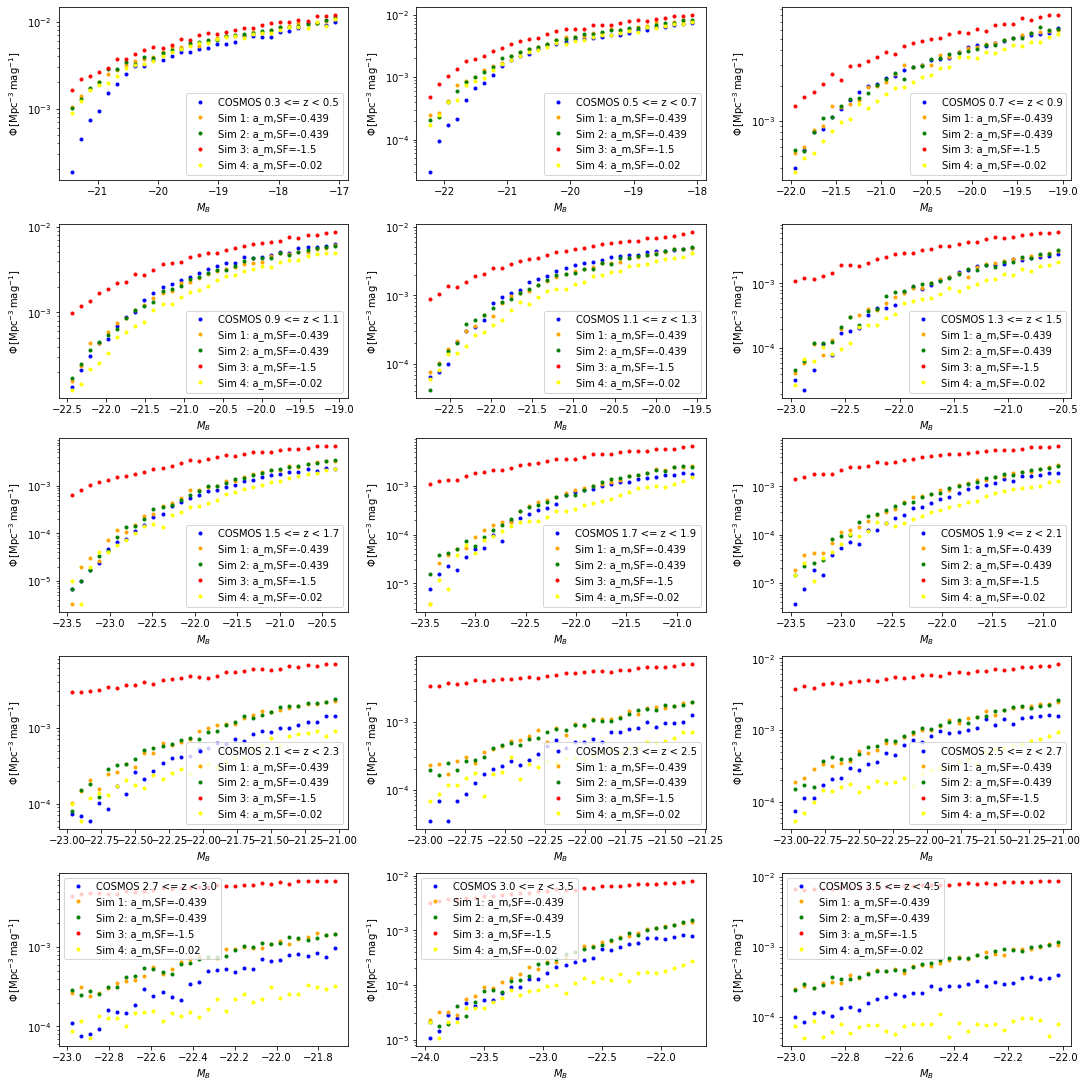

In [57]:
M_ranges = np.array([
    [-21.5, -17],
    [-22.3, -18],
    [-22, -19],
    [-22.5, -19],
    [-22.8, -19.5],
    [-23, -20.5],
    [-23.5, -20.3],
    [-23.5, -20.8],
    [-23.5, -20.8],
    [-23, -21],
    [-23, -21.3],
    [-23, -21],
    [-23, -21.7],
    [-24, -21.7],
    [-23, -22]
])

M_range_wide = [-23.5, -16]

z_slices = ((0.3, 0.5), (0.5, 0.7), (0.7, 0.9), (0.9, 1.1), (1.1, 1.3), 
            (1.3, 1.5), (1.5, 1.7), (1.7, 1.9), (1.9, 2.1), (2.1, 2.3),
            (2.3, 2.5), (2.5, 2.7), (2.7, 3.0), (3.0, 3.5), (3.5, 4.5)
           )

fig, axes = plt.subplots(nrows=5, ncols=3, constrained_layout=True, figsize=(15,15))

for ax, (i,(z_min, z_max)) in zip(axes.flat, enumerate(z_slices)):
    M_bins = np.linspace(M_ranges[i,0], M_ranges[i,1], 31)
    M_mid = (M_bins[1:] + M_bins[:-1])/2.
    phi = get_schechter_z_bin(cosmos['photoz'], cosmos_abs_mag, M_bins, z_min, z_max)
    
    M_bins_wide = np.linspace(M_range_wide[0], M_range_wide[1], 51)
    M_mid_wide = (M_bins_wide[1:] + M_bins_wide[:-1])/2.
    phi_wide = get_schechter_z_bin(cosmos['photoz'], cosmos_abs_mag, M_bins_wide, z_min, z_max)
    
    phi_sim_1 = get_schechter_z_bin(sim_dic['0'][0], sim_dic['0'][1], M_bins, z_min, z_max)
    phi_sim_2 = get_schechter_z_bin(sim_dic['1'][0], sim_dic['1'][1], M_bins, z_min, z_max)
    phi_sim_3 = get_schechter_z_bin(sim_dic['2'][0], sim_dic['2'][1], M_bins, z_min, z_max)
    phi_sim_4 = get_schechter_z_bin(sim_dic['3'][0], sim_dic['3'][1], M_bins, z_min, z_max)
    
    phi_sim_1_wide = get_schechter_z_bin(sim_dic['0'][0], sim_dic['0'][1], M_bins_wide, z_min, z_max)
    phi_sim_2_wide = get_schechter_z_bin(sim_dic['1'][0], sim_dic['1'][1], M_bins_wide, z_min, z_max)
    phi_sim_3_wide = get_schechter_z_bin(sim_dic['2'][0], sim_dic['2'][1], M_bins_wide, z_min, z_max)
    phi_sim_4_wide = get_schechter_z_bin(sim_dic['3'][0], sim_dic['3'][1], M_bins_wide, z_min, z_max)
    
    ax.plot(M_mid, phi, '.', label=f"COSMOS {z_min} <= z < {z_max}", c='b')
#     ax.plot(M_mid_wide, phi_wide, '-', label=f"COSMOS wide", c='b')
   
    ax.plot(M_mid, phi_sim_1, '.', label=f"Sim 1: a_m,SF={a_params[0]}", c='orange')
    ax.plot(M_mid, phi_sim_2, '.', label=f"Sim 2: a_m,SF={a_params[1]}", c='green')
    ax.plot(M_mid, phi_sim_3, '.', label=f"Sim 3: a_m,SF={a_params[2]}", c='red')
    ax.plot(M_mid, phi_sim_4, '.', label=f"Sim 4: a_m,SF={a_params[3]}", c='yellow')
    
#     ax.plot(M_mid_wide, phi_sim_1_wide, '-', label=f"Sim 1 wide", c='orange')
#     ax.plot(M_mid_wide, phi_sim_2_wide, '-', label=f"Sim 2 wide", c='green')
#     ax.plot(M_mid_wide, phi_sim_3_wide, '-', label=f"Sim 3 wide", c='red')
#     ax.plot(M_mid_wide, phi_sim_4_wide, '-', label=f"Sim 4 wide", c='yellow')
    
    ax.set_xlabel(r'$M_B$')
    ax.set_ylabel(r'$\Phi \, [\mathrm{Mpc}^{-3} \, \mathrm{mag}^{-1}]$')
    ax.legend()
#     ax.set_xlim([-25.5, -15.5])
    ax.set_yscale('log')
    
plt.show()

## Compare Data to Sim in redshift bins for multiple parameters

Here, I compare the data sims with different parameters in different redshift bins. I want to see how sensitive the lum funtion in these bins is to the parameters.

In this way I also want to find a good choice of redshift and magnitude bins to fit the parameters.

In [79]:
sim_dic = {}
# list of the parameters that I fit
params = ['a_m_SF', 'b_m_SF', 'a_phi_SF', 'b_phi_SF', 'alpha_SF',
          'a_m_Q', 'a_phi_Q', 'b_phi_Q', 'b_m_Q', 'alpha_Q']
params_values = [
                    [-0.439, -0.6, -0.02],
                    [-20.623, -18, -25],
                    [-0.088, -0.1, -0.05],
                    [0.004245, 0.01, 0.001],
                    [-1.3, -0.5, -2.0],
                    [-0.697, -1, -0.3],
                    [-0.836, -0.5, -1],
                    [0.005169, 0.01, 0.001],
                    [-20.372, -18, -22],
                    [-0.5, -1.5, -0.2]
                ]

pipeline = Pipeline.read("COSMOS2020_tortorelli2021.yaml")
parameter_dic = pipeline[0].copy()

for i in range(len(params_values[0])):
    for num_param,p in enumerate(params):
        parameter_dic[p] = params_values[num_param][i]
    parameter_dic['a_phi-1_SF'] = 1./params_values[2][i]
    parameter_dic['a_phi-1_Q'] = 1./params_values[6][i]
    print(parameter_dic)
    pipeline.execute(parameter_dic)
    sim_sf = pipeline['SF']
    sim_q = pipeline['Q']
    sim = np.concatenate((sim_sf, sim_q))
    mask = np.where((sim['m_vista_true'][:,3]+sim['m_vista_sim'][:,3]<24.5)&(sim['z']>0))[0]
    sim = sim[mask]
    k_correct_interp = k_correction_interp_before_int_ratio(kcorr_templates, kcorr_wave, sim['z'],  
                                                B_band, i_band, sim['coeff'])
    abs_mag_sim_kcorrect_interp = sim['m_hsc_true'][:,2] + sim['m_hsc_sim'][:,2] - cosmo.distmod(sim['z']).value \
                                - k_correct_interp
    
    sim_dic[str(i)] = (sim['z'], abs_mag_sim_kcorrect_interp)
print(sim_dic)

INFO:skypy.pipeline:Setting cosmology
INFO:skypy.pipeline:Calling FlatLambdaCDM
INFO:skypy.pipeline:Generating mag_lim
INFO:skypy.pipeline:Generating sky_area
INFO:skypy.pipeline:Generating filters
INFO:skypy.pipeline:Generating bands_hsc
INFO:skypy.pipeline:Generating bands_vista
INFO:skypy.pipeline:Generating mag_limits
INFO:skypy.pipeline:Generating z_range
INFO:skypy.pipeline:Calling geomspace
INFO:skypy.pipeline:Generating SF
INFO:skypy.pipeline:Calling Table
INFO:skypy.pipeline:Generating Q
INFO:skypy.pipeline:Calling Table
INFO:skypy.pipeline:Generating SF.z, M_B
INFO:skypy.pipeline:Calling Linear1D
INFO:skypy.pipeline:Calling Exponential1D
INFO:skypy.pipeline:Calling schechter_lf


{'a_m_SF': -0.439, 'b_m_SF': -20.623, 'a_phi_SF': -0.088, 'b_phi_SF': 0.004245, 'a_m_Q': -0.697, 'b_m_Q': -20.372, 'a_phi_Q': -0.836, 'b_phi_Q': 0.005169, 'a_phi-1_SF': -11.363636363636365, 'a_phi-1_Q': -1.1961722488038278, 'alpha_SF': -1.3, 'alpha_Q': -0.5}


INFO:skypy.pipeline:Generating Q.z, M_B
INFO:skypy.pipeline:Calling Linear1D
INFO:skypy.pipeline:Calling Exponential1D
INFO:skypy.pipeline:Calling schechter_lf
INFO:skypy.pipeline:Generating SF.coeff
INFO:skypy.pipeline:Calling zeros_like
INFO:skypy.pipeline:Calling dirichlet_coefficients
INFO:skypy.pipeline:Generating Q.coeff
INFO:skypy.pipeline:Calling zeros_like
INFO:skypy.pipeline:Calling dirichlet_coefficients
INFO:skypy.pipeline:Generating SF.sm
INFO:skypy.pipeline:Calling stellar_mass
INFO:skypy.pipeline:Generating Q.sm
INFO:skypy.pipeline:Calling stellar_mass
INFO:skypy.pipeline:Generating SF.m_hsc_true
INFO:skypy.pipeline:Calling apparent_magnitudes
INFO:skypy.pipeline:Generating SF.m_vista_true
INFO:skypy.pipeline:Calling apparent_magnitudes
INFO:skypy.pipeline:Generating Q.m_hsc_true
INFO:skypy.pipeline:Calling apparent_magnitudes
INFO:skypy.pipeline:Generating Q.m_vista_true
INFO:skypy.pipeline:Calling apparent_magnitudes
INFO:skypy.pipeline:Generating SF.m_hsc_sim, hsc_sig

{'a_m_SF': -0.6, 'b_m_SF': -18, 'a_phi_SF': -0.1, 'b_phi_SF': 0.01, 'a_m_Q': -1, 'b_m_Q': -18, 'a_phi_Q': -0.5, 'b_phi_Q': 0.01, 'a_phi-1_SF': -10.0, 'a_phi-1_Q': -2.0, 'alpha_SF': -0.5, 'alpha_Q': -1.5}


INFO:skypy.pipeline:Generating Q.z, M_B
INFO:skypy.pipeline:Calling Linear1D
INFO:skypy.pipeline:Calling Exponential1D
INFO:skypy.pipeline:Calling schechter_lf
INFO:skypy.pipeline:Generating SF.coeff
INFO:skypy.pipeline:Calling zeros_like
INFO:skypy.pipeline:Calling dirichlet_coefficients
INFO:skypy.pipeline:Generating Q.coeff
INFO:skypy.pipeline:Calling zeros_like
INFO:skypy.pipeline:Calling dirichlet_coefficients
INFO:skypy.pipeline:Generating SF.sm
INFO:skypy.pipeline:Calling stellar_mass
INFO:skypy.pipeline:Generating Q.sm
INFO:skypy.pipeline:Calling stellar_mass
INFO:skypy.pipeline:Generating SF.m_hsc_true
INFO:skypy.pipeline:Calling apparent_magnitudes
INFO:skypy.pipeline:Generating SF.m_vista_true
INFO:skypy.pipeline:Calling apparent_magnitudes
INFO:skypy.pipeline:Generating Q.m_hsc_true
INFO:skypy.pipeline:Calling apparent_magnitudes
INFO:skypy.pipeline:Generating Q.m_vista_true
INFO:skypy.pipeline:Calling apparent_magnitudes
INFO:skypy.pipeline:Generating SF.m_hsc_sim, hsc_sig

{'a_m_SF': -0.02, 'b_m_SF': -25, 'a_phi_SF': -0.05, 'b_phi_SF': 0.001, 'a_m_Q': -0.3, 'b_m_Q': -22, 'a_phi_Q': -1, 'b_phi_Q': 0.001, 'a_phi-1_SF': -20.0, 'a_phi-1_Q': -1.0, 'alpha_SF': -2.0, 'alpha_Q': -0.2}


INFO:skypy.pipeline:Generating Q.z, M_B
INFO:skypy.pipeline:Calling Linear1D
INFO:skypy.pipeline:Calling Exponential1D
INFO:skypy.pipeline:Calling schechter_lf
INFO:skypy.pipeline:Generating SF.coeff
INFO:skypy.pipeline:Calling zeros_like
INFO:skypy.pipeline:Calling dirichlet_coefficients
INFO:skypy.pipeline:Generating Q.coeff
INFO:skypy.pipeline:Calling zeros_like
INFO:skypy.pipeline:Calling dirichlet_coefficients
INFO:skypy.pipeline:Generating SF.sm
INFO:skypy.pipeline:Calling stellar_mass
INFO:skypy.pipeline:Generating Q.sm
INFO:skypy.pipeline:Calling stellar_mass
INFO:skypy.pipeline:Generating SF.m_hsc_true
INFO:skypy.pipeline:Calling apparent_magnitudes
INFO:skypy.pipeline:Generating SF.m_vista_true
INFO:skypy.pipeline:Calling apparent_magnitudes
INFO:skypy.pipeline:Generating Q.m_hsc_true
INFO:skypy.pipeline:Calling apparent_magnitudes
INFO:skypy.pipeline:Generating Q.m_vista_true
INFO:skypy.pipeline:Calling apparent_magnitudes
INFO:skypy.pipeline:Generating SF.m_hsc_sim, hsc_sig

{'0': (array([4.28935483, 1.13388816, 0.7318322 , ..., 1.04866858, 2.14753503,
       2.34465029]), array([-21.78320312, -19.8991687 , -21.53276981, ..., -21.0231136 ,
       -20.77366037, -22.47251102])), '1': (array([0.364235  , 0.32927906, 0.89052988, ..., 1.04858943, 0.33386002,
       0.36868244]), array([-15.59235562, -18.69657878, -18.53728293, ..., -18.99569743,
       -15.18195645, -17.74895893])), '2': (array([0.65515625, 0.1241121 , 4.13244361, ..., 3.83096266, 0.52202827,
       1.17710216]), array([-17.65619449, -14.53521423, -22.65164154, ..., -23.36949444,
       -21.08540523, -20.44194355]))}


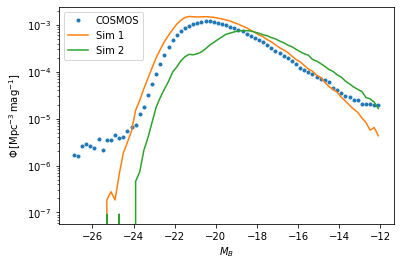

In [94]:
redshift_range = [0.01,4.5]
z_grid = np.linspace(redshift_range[0], redshift_range[1], 100)

cosmos_phi = sim_hist(z_grid, cosmos['photoz'], cosmology, sky_area, cosmos_abs_mag, Mbins)
sim_1_phi = sim_hist(z_grid, sim_dic['0'][0], cosmology, sky_area, sim_dic['0'][1], Mbins)
sim_2_phi = sim_hist(z_grid, sim_dic['1'][0], cosmology, sky_area, sim_dic['1'][1], Mbins)
sim_3_phi = sim_hist(z_grid, sim_dic['2'][0], cosmology, sky_area, sim_dic['2'][1], Mbins)

plt.plot(Mmid, cosmos_phi, '.', label='COSMOS')
plt.plot(Mmid, sim_1_phi, label='Sim 1')
plt.plot(Mmid, sim_2_phi, label='Sim 2')
# plt.plot(Mmid, sim_3_phi, label='Sim 3')
plt.xlabel(r'$M_B$')
plt.ylabel(r'$\Phi \, [\mathrm{Mpc}^{-3} \, \mathrm{mag}^{-1}]$')
plt.yscale('log')
plt.legend()
plt.show()

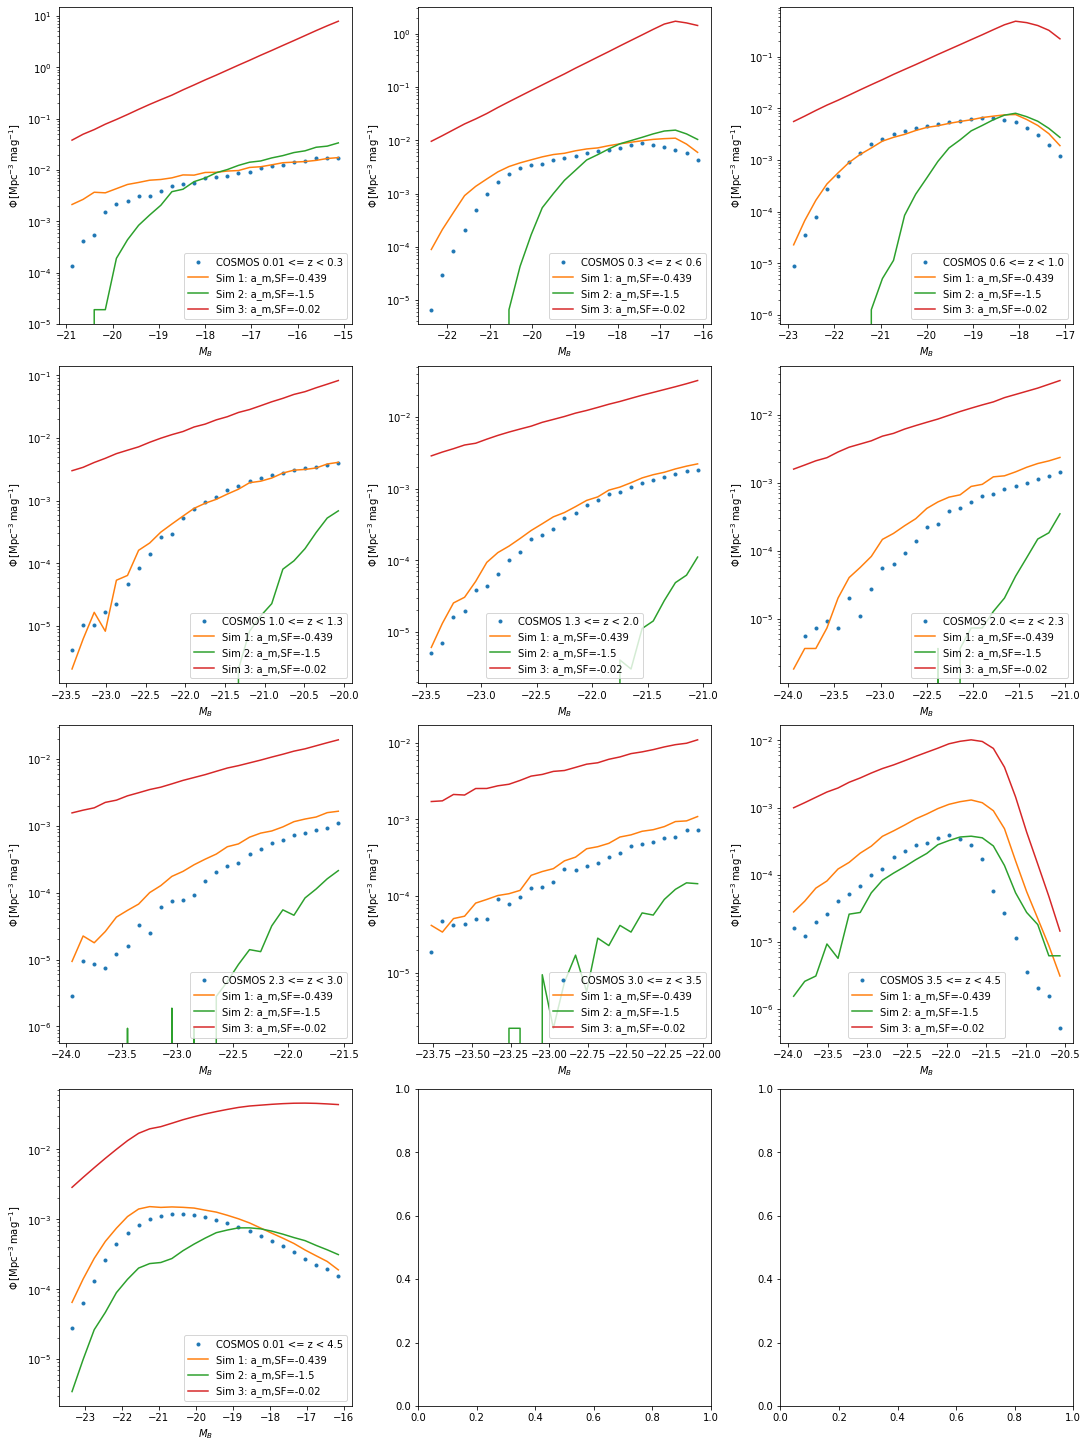

In [91]:
M_ranges = np.array([
    [-21, -15],
    [-22.5, -16],
    [-23, -17],
    [-23.5, -20],
    [-23.5, -21],
    [-24, -21],
    [-24, -21.5],
    [-23.8, -22],
    [-24, -20.5],
    [-23.5, -16]
])

# z_slices = ((0.01, 1.5), (1.5, 2.0), (2.0, 2.2), (2.2, 2.4),
#             (2.4, 2.6), (2.6, 2.8), (2.8, 3.0), (3, 3.5), (3.5, 4.5)
#            )

# z_slices = ((0.01, 0.2), (0.2, 0.4), (0.4, 0.6), (0.6, 0.8), (0.8, 1.0), 
#             (1.0, 1.2), (1.2, 1.4), (1.4, 1.6), (2, 2.2), (2.2, 2.4),
#             (2.4, 2.6), (2.6, 2.8), (2.8, 3.0), (3.0, 3.2), (3.2, 3.4),
#             (3.4, 3.6), (3.6, 3.8), (3.8, 4.0), (4.0, 4.2), (4.2, 4.5),
#             (0.01, 4.5)
#            )

z_slices = ((0.01, 0.3), (0.3, 0.6), (0.6, 1.0), (1.0, 1.3), (1.3, 2.0),
            (2.0, 2.3), (2.3, 3.0), (3.0, 3.5), (3.5, 4.5), (0.01, 4.5)
           )

fig, axes = plt.subplots(nrows=4, ncols=3, constrained_layout=True, figsize=(15,20))

Mbins = np.arange(-27,-12+0.2,0.2)
Mmid = (Mbins[1:] + Mbins[:-1])/2.

for ax, (i,(z_min, z_max)) in zip(axes.flat, enumerate(z_slices)):
    M_bins = np.linspace(M_ranges[i,0], M_ranges[i,1], 26)
    M_mid = (M_bins[1:] + M_bins[:-1])/2.
    phi = get_schechter_z_bin(cosmos['photoz'], cosmos_abs_mag, M_bins, z_min, z_max)
    
    phi_sim_1 = get_schechter_z_bin(sim_dic['0'][0], sim_dic['0'][1], M_bins, z_min, z_max)
    phi_sim_2 = get_schechter_z_bin(sim_dic['1'][0], sim_dic['1'][1], M_bins, z_min, z_max)
    phi_sim_3 = get_schechter_z_bin(sim_dic['2'][0], sim_dic['2'][1], M_bins, z_min, z_max)
    
    phi_sim_1_wide = get_schechter_z_bin(sim_dic['0'][0], sim_dic['0'][1], Mbins, z_min, z_max)
    phi_sim_2_wide = get_schechter_z_bin(sim_dic['1'][0], sim_dic['1'][1], Mbins, z_min, z_max)
    phi_sim_3_wide = get_schechter_z_bin(sim_dic['2'][0], sim_dic['2'][1], Mbins, z_min, z_max)
    
#     M_mask = (Mbins[1:] <= M_ranges[i,1]) & (Mbins[:-1] > M_ranges[i,0])
#     M_mask = (Mbins[1:] <= -12) & (Mbins[:-1] > -27)
    
    ax.plot(M_mid, phi, '.', label=f"COSMOS {z_min} <= z < {z_max}")
   
    ax.plot(M_mid, phi_sim_1, '-', label=f"Sim 1: a_m,SF={a_params[0]}")
    ax.plot(M_mid, phi_sim_2, '-', label=f"Sim 2: a_m,SF={a_params[1]}")
    ax.plot(M_mid, phi_sim_3, '-', label=f"Sim 3: a_m,SF={a_params[2]}")
    
#     ax.plot(Mmid, phi_sim_1_wide, '.', label=f"Sim 1 wide")
#     ax.plot(Mmid, phi_sim_2_wide, '.', label=f"Sim 2 wide")
#     ax.plot(Mmid, phi_sim_3_wide, '.', label=f"Sim 3 wide")
    
    ax.set_xlabel(r'$M_B$')
    ax.set_ylabel(r'$\Phi \, [\mathrm{Mpc}^{-3} \, \mathrm{mag}^{-1}]$')
    ax.legend()
#     ax.set_xlim([-25.5, -15.5])
    ax.set_yscale('log')
    
plt.show()